In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [4]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [6]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [7]:
df[['EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',]]

EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                           2  Female          94               3         2   
1                           3    Male          61               2         2   
2                           4    Male          92               2         1   
3                           4  Female          56               3         1   
4                           1    Male          40               3         1   
...                       ...     ...         ...             ...       ...   
1465                        3    Male          41               4         2   
1466                        4    Male          42               2         3   
1467                        2    Male          87               4         2   
1468                        4    Male          63               2         2   
1469                        2    Male          82               4         2   

                        JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0               Sales Executive                4        Single           5993   
1            Research Scientist                2       Married           5130   
2         Laboratory Technician                3        Single           2090   
3            Research Scientist                3       Married           2909   
4         Laboratory Technician                2       Married           3468   
...                         ...              ...           ...            ...   
1465      Laboratory Technician                4       Married           2571   
1466  Healthcare Representative                1       Married           9991   
1467     Manufacturing Director                2       Married           6142   
1468            Sales Executive                2       Married           5390   
1469      Laboratory Technician                3       Married           4404   

      MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0           19479                   8      Y      Yes                 11   
1           24907                   1      Y       No                 23   
2            2396                   6      Y      Yes                 15   
3           23159                   1      Y      Yes                 11   
4           16632                   9      Y       No                 12   
...           ...                 ...    ...      ...                ...   
1465        12290                   4      Y       No                 17   
1466        21457                   4      Y       No                 15   
1467         5174                   1      Y      Yes                 20   
1468        13243                   2      Y       No                 14   
1469        10228                   2      Y       No                 12   

      PerformanceRating  
0                     3  
1                     4  
2                     3  
3                     3  
4                     3  
...                 ...  
1465                  3  
1466                  3  
1467                  4  
1468                  3  
1469                  3  

[1470 rows x 15 columns]

In [8]:
#shape of the data
df.shape

(1470, 35)

In [9]:
#First understand the Data and its columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
df[(df == '?') | (df == ' ') | (df == 'Na') | (df == 'None')].count()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
#There is no null/missing values Suspecious is Zero Now so lets check if its valid or not ?!

In [13]:
#MonthlyIncome if its 0 --> *SUSPECIOUS*
df[df['MonthlyIncome']==0]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

In [14]:
#MonthlyRate, HourlyRate, DailyRate if all of its is 0 --> *SUSPECIOUS*
df[(df['MonthlyRate']==0) & (df['HourlyRate']==0) & (df['DailyRate']==0)]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

In [15]:
#if anyone of them is zero which means something is suspecious even in one  column if there is zero even seperatly *suspecious*
df[(df['MonthlyRate']==0) | (df['HourlyRate']==0) | (df['DailyRate']==0)]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

In [16]:
df[df['TotalWorkingYears']==0][['DailyRate','Age', 'JobLevel', 'YearsAtCompany']]
#by seeing output seems like these are the freshers/interns
#coz:
#most of them are paid lesss dailyrate
#almost all employess are in their 18 - 21  which means they are freshers/interns
#Joblevel is 1 evrywhere

DailyRate  Age  JobLevel  YearsAtCompany
23          391   21         1               0
127         528   19         1               0
296         230   18         1               0
301         812   18         1               0
457        1306   18         1               0
615         443   27         1               0
727         287   18         1               0
828         247   18         1               0
972        1124   18         1               0
1153        544   18         1               0
1311       1431   18         1               0

In [17]:
df[(df['TotalWorkingYears']==0) | df['YearsAtCompany']==0][['TotalWorkingYears', 'YearsAtCompany']]
#There's nothing i find suspecious coz its possible tthese ppl are new in the company with nyrs of experience

TotalWorkingYears  YearsAtCompany
2                     7               0
77                   17               0
86                    3               0
109                   1               0
171                   1               0
264                   5               0
265                  10               0
347                   5               0
352                  15               0
460                   8               0
490                   8               0
560                   7               0
585                   1               0
602                  12               0
678                  13               0
711                   3               0
801                   5               0
803                   6               0
860                   1               0
862                   6               0
866                   5               0
936                  22               0
1060                  4               0
1068                  8               0
1074                 14               0
1202                  7               0
1237                 10               0
1255                 11               0
1287                 10               0
1319                  4               0
1325                  8               0
1371                  6               0
1378                 14               0

In [18]:
df[df['TotalWorkingYears']==0]['NumCompaniesWorked']
#this is also totally fine may be the employes are freshers/interns its understandable or may be they switched the company before the yr

23      1
127     1
296     1
301     1
457     1
615     1
727     1
828     1
972     1
1153    1
1311    1
Name: NumCompaniesWorked, dtype: int64

In [19]:
df[(df['NumCompaniesWorked']==0) & (df['TotalWorkingYears']>0)][['TotalWorkingYears', 'NumCompaniesWorked']]
#yo finally i got something suspecious baby coz how is it possible employee having working Workexp > 0 n yet NumCOmWorked == 0

TotalWorkingYears  NumCompaniesWorked
5                     8                   0
8                    10                   0
10                    6                   0
11                   10                   0
13                    3                   0
...                 ...                 ...
1439                 10                   0
1445                 21                   0
1462                 21                   0
1463                 10                   0
1464                  5                   0

[197 rows x 2 columns]

In [20]:
df[(df['NumCompaniesWorked']==0) & (df['TotalWorkingYears']==0)][['NumCompaniesWorked', 'TotalWorkingYears']]
#there is no rows which satisfies this conditon even if it satisfied it would be ok coz may be those employees are new joiny

Empty DataFrame
Columns: [NumCompaniesWorked, TotalWorkingYears]
Index: []

In [21]:
df[df['NumCompaniesWorked']>0][['NumCompaniesWorked', 'TotalWorkingYears']]
# i m just reading the data comparing both the columns

NumCompaniesWorked  TotalWorkingYears
0                      8                  8
1                      1                 10
2                      6                  7
3                      1                  8
4                      9                  6
...                  ...                ...
1465                   4                 17
1466                   4                  9
1467                   1                  6
1468                   2                 17
1469                   2                  6

[1273 rows x 2 columns]

In [22]:
df[(df['TotalWorkingYears']>5) & (df['NumCompaniesWorked']==1)]
#weather is it common in data haveing  more than 5+ yrs of exp and yet numcompworked is only 1 
# so total thereis317rowsalmost 21% of the whole data which means there are many ppl who is working in the same company since they joined

Age Attrition     BusinessTravel  DailyRate              Department  \
1      49        No  Travel_Frequently        279  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
32     30        No      Travel_Rarely        125  Research & Development   
...   ...       ...                ...        ...                     ...   
1447   36        No         Non-Travel        301                   Sales   
1450   35        No      Travel_Rarely       1146         Human Resources   
1451   38        No      Travel_Rarely        345                   Sales   
1456   35        No  Travel_Frequently       1199  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1                    8          1  Life Sciences              1   
3                    3          4  Life Sciences              1   
15                  21          4  Life Sciences              1   
26                  16          1  Life Sciences              1   
32                   9          2        Medical              1   
...                ...        ...            ...            ...   
1447                15          4      Marketing              1   
1450                26          4  Life Sciences              1   
1451                10          2  Life Sciences              1   
1456                18          4  Life Sciences              1   
1467                 4          3  Life Sciences              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1                  2  ...                         4            80   
3                  5  ...                         3            80   
15                20  ...                         3            80   
26                33  ...                         2            80   
32                41  ...                         1            80   
...              ...  ...                       ...           ...   
1447            2036  ...                         1            80   
1450            2040  ...                         3            80   
1451            2041  ...                         3            80   
1456            2049  ...                         4            80   
1467            2064  ...                         2            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1                    1                 10                      3   
3                    0                  8                      3   
15                   1                 10                      1   
26                   0                 10                      5   
32                   0                 10                      5   
...                ...                ...                    ...   
1447                 1                 15                      4   
1450                 0                  9                      2   
1451                 1                 10                      1   
1456                 2                 10                      2   
1467                 1                  6                      0   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1                  3              10                  7   
3                  3               8                  7   
15                 3              10                  9   
26                 3              10                  2   
32                 3              10                  0   
...              ...             ...                ...   
1447               2              15                 12   
1450               3               9                  0   
1451               3              10                  7   
1456               4              10    

In [23]:
df[(df['NumCompaniesWorked']>0) & (df['TotalWorkingYears'] ==0) & (df['Attrition']=='Yes')][['NumCompaniesWorked', 'TotalWorkingYears', 'Attrition']]
#possible chances the employee who worked in this company was an intern for the short term hence TotalWorkingYears == 0

NumCompaniesWorked  TotalWorkingYears Attrition
127                    1                  0       Yes
296                    1                  0       Yes
457                    1                  0       Yes
828                    1                  0       Yes
1153                   1                  0       Yes

In [24]:
#now in the above all process what we saw is there is something suspecious whe we compared totalworkingyears and numcompaniesworked
# we saw totalworkingyears is more than 0 yet numcompanies is 0
#2 scenerio 
#1: the value is filled as 0 in  column numcompaniesworked where totalworkingyears is > 0
#2: may be data filled in that way that unless you dont change the company there will be 0 in numcompaniesworked and there is ppl who
#are wokring since more than 5 years in the same company since they joined their first company so there will be 0 unless they dont quite
#the company and change another there will be 0 only unless they dont quite 

In [25]:
# Deep Data Validation on 'NumCompaniesWorked' vs 'TotalWorkingYears' and 'YearsAtCompany'

# Problem Summary:
# There are 197 rows where 'TotalWorkingYears' > 0 but 'NumCompaniesWorked' == 0.
# This is suspicious — if someone has work experience, they must have worked in at least one company.

# Now, let's break it down into valid and invalid cases using additional columns like 'YearsAtCompany' and 'Attrition'.

# ✅ Case 1 (Valid):
# If 'TotalWorkingYears' == 'YearsAtCompany' AND 'Attrition' == 'No'
# → This means the employee is still working in their first company and has never switched jobs.
# → In this case, 'NumCompaniesWorked' being 0 is valid and makes sense.

# ❌ Case 2 (Invalid):
# If 'TotalWorkingYears' != 'YearsAtCompany' AND 'NumCompaniesWorked' == 0
# → This implies the employee has switched companies (since total experience > current company years),
#    but the number of companies is still recorded as 0, which is incorrect.
# → Therefore, this data is inconsistent and needs correction.
# → Note: This case can appear even if 'Attrition' == 'No', but logically switching companies means NumCompaniesWorked ≥ 1.

# ❌ Case 3 (Invalid):
# If 'TotalWorkingYears' == 'YearsAtCompany' AND 'Attrition' == 'Yes'
# → Even though the duration matches, the employee has left the company.
#    If they had only one job, 'NumCompaniesWorked' should be 1 (not 0).
# → So again, 'NumCompaniesWorked' == 0 is incorrect here and should be updated.

# Final Action:
# - For rows that satisfy Case 2 and Case 3, we should fix the 'NumCompaniesWorked' value.
# - Instead of updating all 197 rows blindly, we validate using 'YearsAtCompany' and 'Attrition' to selectively correct only inconsistent rows.


In [26]:
#Case1: a) check NumCompaniesWorked == 0 & TotalWorkingYears > 0 --> 197rows
df[(df['NumCompaniesWorked'] == 0) & (df['TotalWorkingYears'] > 0)][['TotalWorkingYears', 'YearsAtCompany', 'NumCompaniesWorked', 'Attrition']]

TotalWorkingYears  YearsAtCompany  NumCompaniesWorked Attrition
5                     8               7                   0        No
8                    10               9                   0        No
10                    6               5                   0        No
11                   10               9                   0        No
13                    3               2                   0        No
...                 ...             ...                 ...       ...
1439                 10               9                   0        No
1445                 21              20                   0        No
1462                 21              20                   0        No
1463                 10               9                   0        No
1464                  5               4                   0        No

[197 rows x 4 columns]

In [27]:
#Case1: b) check NumCompaniesWorked == 0 & TotalWorkingYears > 0 & Attrition == 'No' --> 174rows
df[(df['NumCompaniesWorked'] == 0) & (df['TotalWorkingYears'] > 0) & (df['Attrition']=='No')][['TotalWorkingYears', 'YearsAtCompany', 'NumCompaniesWorked', 'Attrition']]

TotalWorkingYears  YearsAtCompany  NumCompaniesWorked Attrition
5                     8               7                   0        No
8                    10               9                   0        No
10                    6               5                   0        No
11                   10               9                   0        No
13                    3               2                   0        No
...                 ...             ...                 ...       ...
1439                 10               9                   0        No
1445                 21              20                   0        No
1462                 21              20                   0        No
1463                 10               9                   0        No
1464                  5               4                   0        No

[174 rows x 4 columns]

In [28]:
#Case1: b) check NumCompaniesWorked == 0 & TotalWorkingYears > 0 & Attrition == 'Yes' --> 23rows
df[(df['NumCompaniesWorked'] == 0) & (df['TotalWorkingYears'] > 0) & (df['Attrition']=='Yes')][['TotalWorkingYears', 'YearsAtCompany', 'NumCompaniesWorked', 'Attrition']]

TotalWorkingYears  YearsAtCompany  NumCompaniesWorked Attrition
69                    2               1                   0       Yes
171                   1               0                   0       Yes
217                   7               6                   0       Yes
239                   4               3                   0       Yes
259                   6               5                   0       Yes
382                   7               6                   0       Yes
415                   3               2                   0       Yes
453                   8               7                   0       Yes
495                   5               4                   0       Yes
666                   4               3                   0       Yes
709                   4               3                   0       Yes
732                   4               3                   0       Yes
791                   9               8                   0       Yes
829                   6               5                   0       Yes
838                  22              21                   0       Yes
860                   1               0                   0       Yes
940                   6               5                   0       Yes
981                   5               4                   0       Yes
1007                  9               8                   0       Yes
1058                 16              15                   0       Yes
1111                 34              33                   0       Yes
1297                  6               5                   0       Yes
1312                  2               1                   0       Yes

In [29]:
#Case1: c) Now apply extra condition TotalWorkingYears == YearsAtCompany
df[
    (df['NumCompaniesWorked'] == 0) &
    (df['TotalWorkingYears'] > 0) &
    (df['TotalWorkingYears'] == df['YearsAtCompany'])
]

#Cas1 : FAILED SUCCESFULLY TotalWorkingYears == YearsAtCompany IS NOT SATISFIED EVEN THERE IS NO SINGLE ROW 

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

In [30]:
#now we need to fill the values which are incosistently given in col numcompaniesworked which is 0 to all 197 rows
#1st optn is to fill 1 in the col numcompaniesworked where there is 0
df[df['NumCompaniesWorked']==1] #so there is already 521 rows which have 1 filled in the numcompaniesworked and after adding 197 more
#rows of value 1 in numcompaniesworked may be the data will be biased or may model will get confused or do wrong predicction

Age Attrition     BusinessTravel  DailyRate              Department  \
1      49        No  Travel_Frequently        279  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
...   ...       ...                ...        ...                     ...   
1451   38        No      Travel_Rarely        345                   Sales   
1456   35        No  Travel_Frequently       1199  Research & Development   
1458   35        No      Travel_Rarely        287  Research & Development   
1460   29        No      Travel_Rarely        468  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1                    8          1  Life Sciences              1   
3                    3          4  Life Sciences              1   
7                   24          1  Life Sciences              1   
12                  26          1  Life Sciences              1   
15                  21          4  Life Sciences              1   
...                ...        ...            ...            ...   
1451                10          2  Life Sciences              1   
1456                18          4  Life Sciences              1   
1458                 1          4  Life Sciences              1   
1460                28          4        Medical              1   
1467                 4          3  Life Sciences              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1                  2  ...                         4            80   
3                  5  ...                         3            80   
7                 11  ...                         2            80   
12                16  ...                         4            80   
15                20  ...                         3            80   
...              ...  ...                       ...           ...   
1451            2041  ...                         3            80   
1456            2049  ...                         4            80   
1458            2052  ...                         4            80   
1460            2054  ...                         2            80   
1467            2064  ...                         2            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1                    1                 10                      3   
3                    0                  8                      3   
7                    1                  1                      2   
12                   1                  5                      1   
15                   1                 10                      1   
...                ...                ...                    ...   
1451                 1                 10                      1   
1456                 2                 10                      2   
1458                 1                  4                      5   
1460                 0                  5                      3   
1467                 1                  6                      0   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1                  3              10                  7   
3                  3               8                  7   
7                  3               1                  0   
12                 2               5                  2   
15                 3              10                  9   
...              ...             ...                ...   
1451               3              10                  7   
1456               4              10                  2   
1458               3               4                  3   
1460               1               5    

In [31]:
#optn 2:  We can fill the value using round of logic round(TotalWorkingYears/YearsAtCompany) -->fill this value 

In [32]:
#--> Conditons : YearsAtCompany should not be zero and should be smaller then or equal totalworkingyears
df[(df['TotalWorkingYears']>0) & (df['NumCompaniesWorked']==0) & (df['YearsAtCompany']==0)][['TotalWorkingYears','YearsAtCompany','NumCompaniesWorked', 'Attrition']]
#output-> There are 2 rows where yearsatcompany zero now we need to fill the values in these 2 col 
#we can see from the below out put totalworkingyears is 1 yearsatcompany is 0 may the person was intern or left the company early
#coz attrition is yes yet there 0 in the NumCompaniesWorked so its inconsistent we can fill value 1 here coz totalworkingyears is 1 
#and attrition is yes 

TotalWorkingYears  YearsAtCompany  NumCompaniesWorked Attrition
171                  1               0                   0       Yes
860                  1               0                   0       Yes

In [33]:
df.loc[(df['TotalWorkingYears']>0) & (df['NumCompaniesWorked']==0) & (df['YearsAtCompany']==0), 'NumCompaniesWorked'] = 1
#Now the value is filled 1 in the NumCompaniesWorked in 2 rows which satifies the above conditions

In [34]:
#Now the Optn2: To fill the value in the inconsistent data 0 in numcompanies worked
#Next Condiiton to check to fill the logical round off in the data 
# check YearsAtCompany should always be smalller or equal to TotaWorkingYears

In [35]:
df[df['TotalWorkingYears']<df['YearsAtCompany']]
#by seeing output we can now fill the value using round off logic of totalworkingyears / yearsatcompany

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

In [36]:
#Before we impute the logic of round(TotalWorkingYears/YearsAtCompany)
#we need to check how much this logic giving accuracy by checking with the given data 
clean_df = df[(df['NumCompaniesWorked'] != 0)&(df['YearsAtCompany'] > 0)&(df['TotalWorkingYears'] > 0)].copy()
clean_df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
6                    3          3        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
6                 10  ...                         1            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
3                    0                  8                      3   
4                    1                  6                      3   
6                    3                 12                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
3                  3               8                  7   
4                  3               2                  2   
6                  2               1                  0   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [37]:
clean_df['Estimated_Com'] = round(clean_df['TotalWorkingYears']/clean_df['YearsAtCompany'])

In [38]:
len(clean_df['Estimated_Com'])

1231

In [39]:
correctmatch = (clean_df['Estimated_Com']==clean_df['NumCompaniesWorked'])

In [40]:
accuracy = (correctmatch.sum()/len(clean_df)*100).astype(int)
accuracy #from the output we can see accuracy is low we can't impute with this logic

np.int64(48)

In [41]:
#lets check the accuracy if we put 1 blindely every 197 row in col numcompaniesworked
clean_df['Numcom_1'] = 1
check = (clean_df['NumCompaniesWorked']==clean_df['Numcom_1'])
check.sum()/len(clean_df)*100

np.float64(41.26726238830219)

In [42]:
clean_df['median_numcom'] = clean_df['NumCompaniesWorked'].median()
test = (clean_df['NumCompaniesWorked']==clean_df['median_numcom'])
test.sum()/len(clean_df)*100

np.float64(11.372867587327375)

In [43]:
#from the above accuracy test we found that accuracy is coming too low to impute the values hence lets check something more suspecious in
#data 

In [44]:
#so we found some relation in the consistent data in the column NumCompaniesWorked
df[(df['NumCompaniesWorked']==0) & (df['TotalWorkingYears']==df['YearsAtCompany']+1)][['TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion']]
#be seeing out put we can see that each row where NumCompaniesWorked have inconsistent data we saw something suspecious
#in these rows TotalWorkingYears is exactly 1 more than YearsAtComapny which shows that atleast person worked in 1 company 

TotalWorkingYears  YearsAtCompany  YearsSinceLastPromotion
5                     8               7                        3
8                    10               9                        1
10                    6               5                        0
11                   10               9                        0
13                    3               2                        1
...                 ...             ...                      ...
1439                 10               9                        3
1445                 21              20                        0
1462                 21              20                        9
1463                 10               9                        1
1464                  5               4                        0

[195 rows x 3 columns]

In [45]:
#Now the other thing is we need to check that in the given data where NumCompaniesWorked filled if the totalworkingyears ==yearsatcompany
#and attrition is no then we need to check, is numcompaniesworked is given 1/0 ? if it is one then we can say that numcompanies will be
#filled even if the employee is working if numcompanies is 0 then we can say that unless the employee change the company or leave there
# will not be any change it will be 0 only 
#from which we can understand what to assume while imputing the inconsistent data if the employee working in the company dont add the 
#count of the that comapny where employee is still working if there is 0 in the numcompaniesworked coloumn in the given data else count1 

In [46]:
df[df['TotalWorkingYears']==df['YearsAtCompany']]['NumCompaniesWorked'].value_counts()
#all rows in the NumCompaniesWorked is 1 regardless of their attrition value everywhere is 1 when we implement this condition
#hence we can say that, in the dataset they are counting the Company even if the employee is still working in the company
#if they are not working thats obvious it should be 1 atleast 

NumCompaniesWorked
1    474
Name: count, dtype: int64

In [47]:
#Now lets check the given data where numcompanies is filled and condition is same as we saw suspecious in the above inconsistent data
clean_df[clean_df['TotalWorkingYears']==clean_df['YearsAtCompany']+1][['TotalWorkingYears', 'YearsAtCompany', 'NumCompaniesWorked','Attrition']].count()

TotalWorkingYears     45
YearsAtCompany        45
NumCompaniesWorked    45
Attrition             45
dtype: int64

In [48]:
#here numcompanies is given 1 which is logically wrong here it should be 2 coz employee worked 1 more year than the worked in YearsAtCompany
#as we saw how the data set is filled in the given data above

In [49]:
#see this condition where 1 is filled which shows in the data set they are counting the companies where even if they are working or not
df[(df['TotalWorkingYears']==df['YearsAtCompany']) & (df['Attrition']=='No')][['YearsAtCompany','TotalWorkingYears','NumCompaniesWorked']].value_counts()

YearsAtCompany  TotalWorkingYears  NumCompaniesWorked
10              10                 1                     75
1               1                  1                     40
5               5                  1                     38
6               6                  1                     30
9               9                  1                     24
8               8                  1                     22
2               2                  1                     20
4               4                  1                     18
3               3                  1                     17
7               7                  1                     16
21              21                 1                      9
11              11                 1                      8
20              20                 1                      8
15              15                 1                      7
14              14                 1                      7
0               0                  1          

In [50]:
#So now impute the data value will be 2 by logic
df.loc[
    (df['NumCompaniesWorked'] != 0) & 
    (df['YearsAtCompany'] > 0) & 
    (df['TotalWorkingYears'] > 0) & 
    (df['TotalWorkingYears'] == df['YearsAtCompany'] + 1),
    'NumCompaniesWorked'
] = 2
#now the value is filled

In [51]:
#lets check if value is filled or not properly 
df[(df['TotalWorkingYears'] == df['YearsAtCompany'] + 1) & 
   (df['YearsAtCompany'] > 0) & 
   (df['TotalWorkingYears'] > 0) & 
   (df['NumCompaniesWorked']> 0)][['YearsAtCompany', 'TotalWorkingYears', 'NumCompaniesWorked']].count()
#see the count of the condition hwere we filled the value and compare with the oldcount of the values which was 45 in clean_df variable

YearsAtCompany        45
TotalWorkingYears     45
NumCompaniesWorked    45
dtype: int64

In [52]:
#now fill 2 in the inconsistent data of column NumCompaniesWorked where 0 is given incorrectly
zero_index = df[(df['NumCompaniesWorked']==0)&(df['TotalWorkingYears']==df['YearsAtCompany']+1)].index
df.loc[zero_index, 'NumCompaniesWorked'] = 2

In [53]:
df.loc[zero_index, ['TotalWorkingYears','YearsAtCompany','NumCompaniesWorked']]
#now the value is filled properly by the logic

TotalWorkingYears  YearsAtCompany  NumCompaniesWorked
5                     8               7                   2
8                    10               9                   2
10                    6               5                   2
11                   10               9                   2
13                    3               2                   2
...                 ...             ...                 ...
1439                 10               9                   2
1445                 21              20                   2
1462                 21              20                   2
1463                 10               9                   2
1464                  5               4                   2

[195 rows x 3 columns]

In [54]:
df[(df['TotalWorkingYears']==0)&(df['YearsAtCompany']==0)][['TotalWorkingYears','YearsAtCompany','NumCompaniesWorked']]

TotalWorkingYears  YearsAtCompany  NumCompaniesWorked
23                    0               0                   1
127                   0               0                   1
296                   0               0                   1
301                   0               0                   1
457                   0               0                   1
615                   0               0                   1
727                   0               0                   1
828                   0               0                   1
972                   0               0                   1
1153                  0               0                   1
1311                  0               0                   1

In [55]:
#Now data looks better lets check if its fine
df['NumCompaniesWorked'].value_counts() #now this column doens't look biased

NumCompaniesWorked
1    478
2    386
3    159
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

In [56]:
(df==0).sum()
#by seeing output, i dont see any inconsistency in the data which is filled with 0

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel            631
TotalWorkingYears            11
TrainingTimesLastYear        54
WorkLifeBalance               0
YearsAtC

In [57]:
#Remove Duplicates
df.duplicated().sum()
#so there is no duplicates

np.int64(0)

In [58]:
df.nunique().sort_values() #checking number of unique values

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked             9
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [59]:
#we droped the unnecessary columns which are not useful in ModelPrediction
df.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [60]:
df.columns.to_list()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [61]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts(),'\n')
#now we can see the output there is nothing filled inncorrect values in this data type like extra spaces which is duplicate

Attrition
No     1233
Yes     237
Name: count, dtype: int64 

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64 

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64 

Gender
Male      882
Female    588
Name: count, dtype: int64 

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64 

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64 

OverTime
No    

In [62]:
df.select_dtypes(include='object').nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [63]:
# Strip and lower all object (categorical) columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()
df.select_dtypes(include='object').nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [64]:
rat_col= ['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance','PerformanceRating','JobInvolvement', 'JobLevel', 'Education']

for col in rat_col:
    print(f"{col}: {df[col].value_counts().sort_index()}")
#in The output we can see there is no 0 coz the value given in the columns are in scale 1 to 4  
#if we would have found any 0 it would be a suspecious row

EnvironmentSatisfaction: EnvironmentSatisfaction
1    284
2    287
3    453
4    446
Name: count, dtype: int64
JobSatisfaction: JobSatisfaction
1    289
2    280
3    442
4    459
Name: count, dtype: int64
RelationshipSatisfaction: RelationshipSatisfaction
1    276
2    303
3    459
4    432
Name: count, dtype: int64
WorkLifeBalance: WorkLifeBalance
1     80
2    344
3    893
4    153
Name: count, dtype: int64
PerformanceRating: PerformanceRating
3    1244
4     226
Name: count, dtype: int64
JobInvolvement: JobInvolvement
1     83
2    375
3    868
4    144
Name: count, dtype: int64
JobLevel: JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64
Education: Education
1    170
2    282
3    572
4    398
5     48
Name: count, dtype: int64


In [65]:
for i in df.columns:
    if df[i].dtype == object:
        print('column name:', df[i].name, df[i].unique())

column name: Attrition ['yes' 'no']
column name: BusinessTravel ['travel_rarely' 'travel_frequently' 'non-travel']
column name: Department ['sales' 'research & development' 'human resources']
column name: EducationField ['life sciences' 'other' 'medical' 'marketing' 'technical degree'
 'human resources']
column name: Gender ['female' 'male']
column name: JobRole ['sales executive' 'research scientist' 'laboratory technician'
 'manufacturing director' 'healthcare representative' 'manager'
 'sales representative' 'research director' 'human resources']
column name: MaritalStatus ['single' 'married' 'divorced']
column name: OverTime ['yes' 'no']


In [66]:
#Now Income Columns of Employees lets see is anything inappropriate in the data or not?
df[['HourlyRate','DailyRate','MonthlyRate','MonthlyIncome']].head(50)

HourlyRate  DailyRate  MonthlyRate  MonthlyIncome
0           94       1102        19479           5993
1           61        279        24907           5130
2           92       1373         2396           2090
3           56       1392        23159           2909
4           40        591        16632           3468
5           79       1005        11864           3068
6           81       1324         9964           2670
7           67       1358        13335           2693
8           44        216         8787           9526
9           94       1299        16577           5237
10          84        809        16479           2426
11          49        153        12682           4193
12          31        670        15170           2911
13          93       1346         8758           2661
14          50        103        12947           2028
15          51       1389        10195           9980
16          80        334        15053           3298
17          96       1123         7324           2935
18          78       1219        22021          15427
19          45        371         4306           3944
20          96        673         8232           4011
21          82       1218         6986           3407
22          53        419        21293          11994
23          96        391        19281           1232
24          83        699        17102           2960
25          58       1282        10735          19094
26          72       1125         4681           3919
27          48        691        21173           6825
28          42        477         2094          10248
29          83        705        22822          18947
30          78        924         6670           2496
31          41       1459        19121           6465
32          83        125        16117           2206
33          56        895         3335           2086
34          61        813         3020           2293
35          72       1273        21923           2645
36          86        869         3810           2683
37          97        890         9687           2014
38          82        852        13072           3419
39          42       1141         3193           5376
40          75        464        10910           1951
41          33       1240        19715           2341
42          48       1357        10558           2293
43          37        994         2975           8726
44          58        721        10781           4011
45          49       1360        16280          19545
46          72       1065        10034           4568
47          73        408        10227           3022
48          98       1211        20445           5772
49          36       1229         4892           2269

In [67]:
# Checking correlation of MonthlyIncome with JobLevel and TotalWorkingYears
# Strong correlation would indicate that the salary is logically consistent
df[['MonthlyIncome', 'JobLevel', 'TotalWorkingYears']].corr()

MonthlyIncome  JobLevel  TotalWorkingYears
MonthlyIncome           1.000000  0.950300           0.772893
JobLevel                0.950300  1.000000           0.782208
TotalWorkingYears       0.772893  0.782208           1.000000

In [68]:
#MonthlyIncome showed high correlation with:
#JobLevel 0.95
#TotalWorkingYears 0.77
#This confirms that MonthlyIncome is logically dependent on career level and experience.

In [69]:
# Grouping by JobLevel to check the salary pattern
df.groupby('JobLevel')['MonthlyIncome'].median()

JobLevel
1     2670.0
2     5340.0
3     9980.0
4    16154.0
5    19232.0
Name: MonthlyIncome, dtype: float64

In [70]:
#Median MonthlyIncome increases with JobLevel,
#e.x:Level 1: ₹2670
#Level 5: ₹19232
#This confirms that salary increases with job level, which is expected and consistent.

In [71]:
#ByGrouping the JobRole and MonthlyIncome we can see how the income distributed to the employees on the basis of their JobRoles

In [72]:
df.groupby(['JobRole'])['MonthlyIncome'].median()

JobRole
healthcare representative     6811.0
human resources               3093.0
laboratory technician         2886.0
manager                      17454.5
manufacturing director        6447.0
research director            16510.0
research scientist            2887.5
sales executive               6231.0
sales representative          2579.0
Name: MonthlyIncome, dtype: float64

In [73]:
#Highest Paying JOBROLE -> Manager 17454
#Lowest Paying JOBROLE -> SalesRepresentative 2579
#from this we can understand that Income distribution looks completely fine logically on the baiss of their profession and JOBLEVEL

In [74]:
# Starting Exploratory Data Analysis (EDA) to understand the data distribution, patterns and trends.
# This step helps visualize relationships between features and the target variable 'Attrition'.

In [75]:
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.0

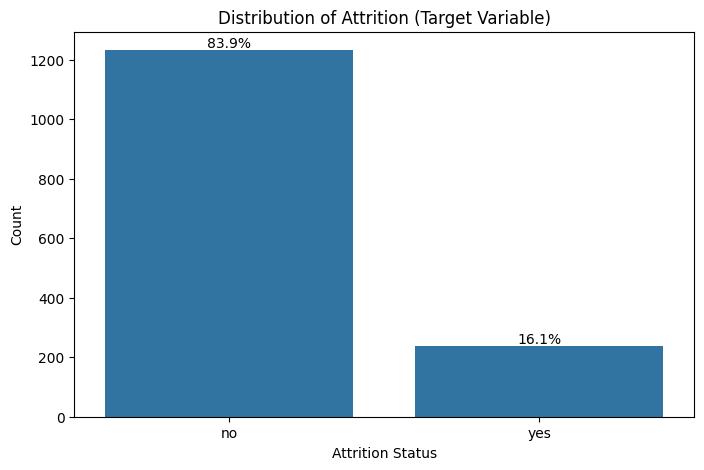

In [76]:
# Attrition distribution plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Attrition', data=df, order=['no', 'yes'])
plt.title('Distribution of Attrition (Target Variable)')
plt.xlabel('Attrition Status')
plt.ylabel('Count')

# Percentage labels on bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 10
    ax.annotate(percentage, (x, y), ha='center')

plt.show()


In [77]:
# This countplot visualizes the distribution of the target variable 'Attrition'.
# It shows the imbalance in classes — majority of employees stayed (Attrition = No),
# while a smaller portion left (Attrition = Yes). This class imbalance will be
# important later when we apply resampling techniques like SMOTE for model training.

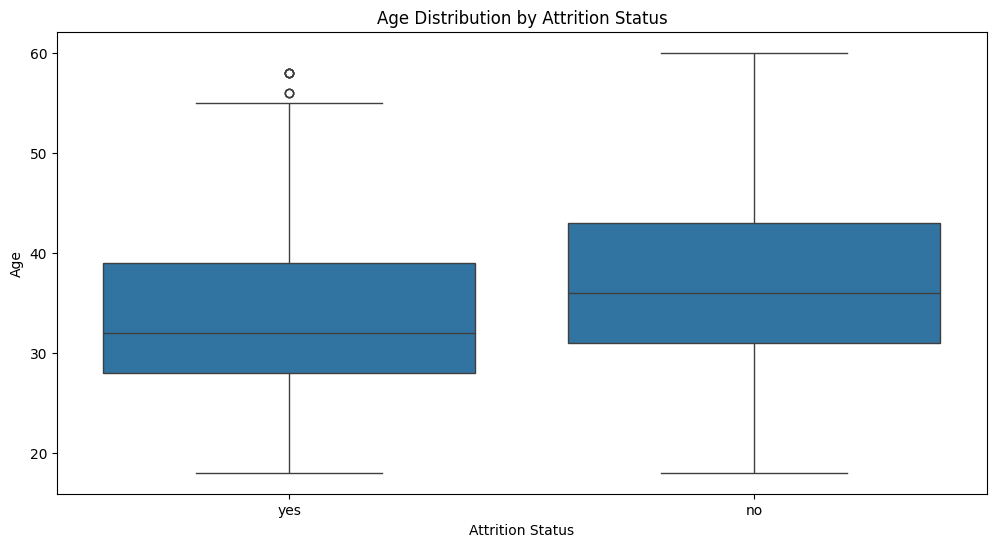

In [78]:
# Visualizing how age varies between employees who left vs stayed
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Attrition Status')
plt.ylabel('Age')
plt.show()

In [79]:
#output:
# Employees who left (Attrition = Yes) tend to be younger on average.
# The median age for leavers is clearly lower than those who stayed.
# This suggests that younger employees may be less stable or seek faster growth.
# No major outliers, but age seems like an important feature influencing attrition.

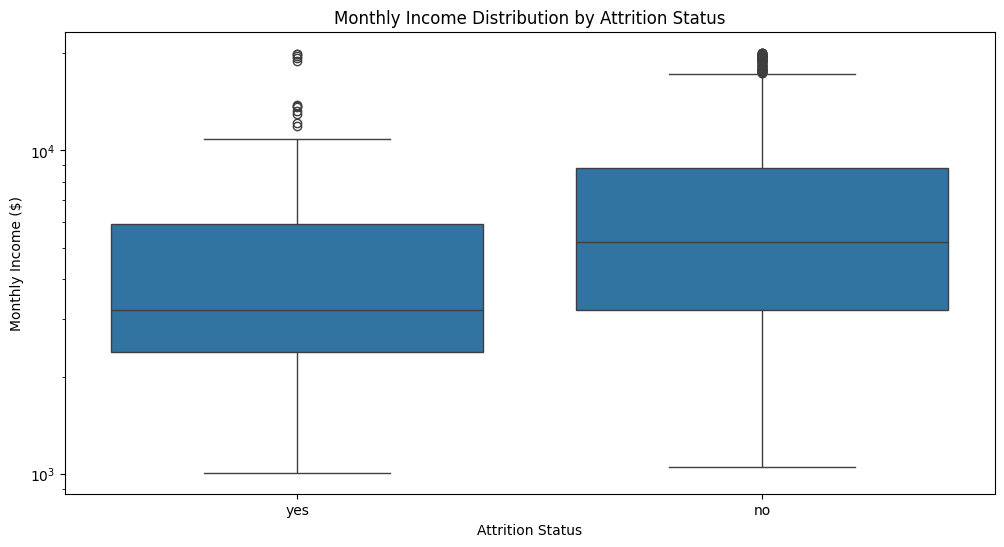

In [80]:
# Visualizing income distribution for employees who left vs stayed
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income Distribution by Attrition Status')
plt.xlabel('Attrition Status')
plt.ylabel('Monthly Income ($)')
plt.yscale('log')  # Log scale to handle right-skewed income distribution
plt.show()

In [81]:
# COMMENT:
# Employees who left generally had lower monthly income than those who stayed.
# The median income for Attrition = Yes is clearly lower than for No.
# Income distribution is right-skewed, hence log scale makes the spread clearer.
# Suggests low salary might be a contributing factor to attrition.

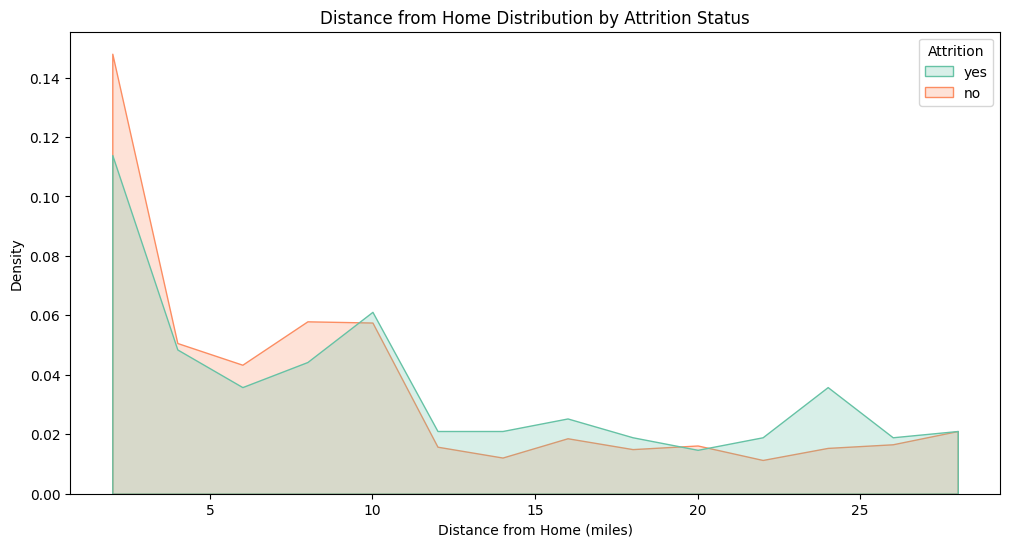

In [82]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='DistanceFromHome',
    hue='Attrition',
    element='poly',  # same step-style but now area will fill properly
    stat='density',
    common_norm=False,
    palette='Set2'
)
plt.title('Distance from Home Distribution by Attrition Status')
plt.xlabel('Distance from Home (miles)')
plt.ylabel('Density')
plt.show()


In [83]:
# Explanation (output-based):
# - Most employees live within 10 miles of the workplace.
# - Those who left the company ('Yes') are slightly more frequent among those with longer commutes.
# - A visible shift in the density curve of 'Yes' compared to 'No' indicates distance might influence attrition.
# - This suggests improving commute policies or flexibility could reduce attrition for distant employees.

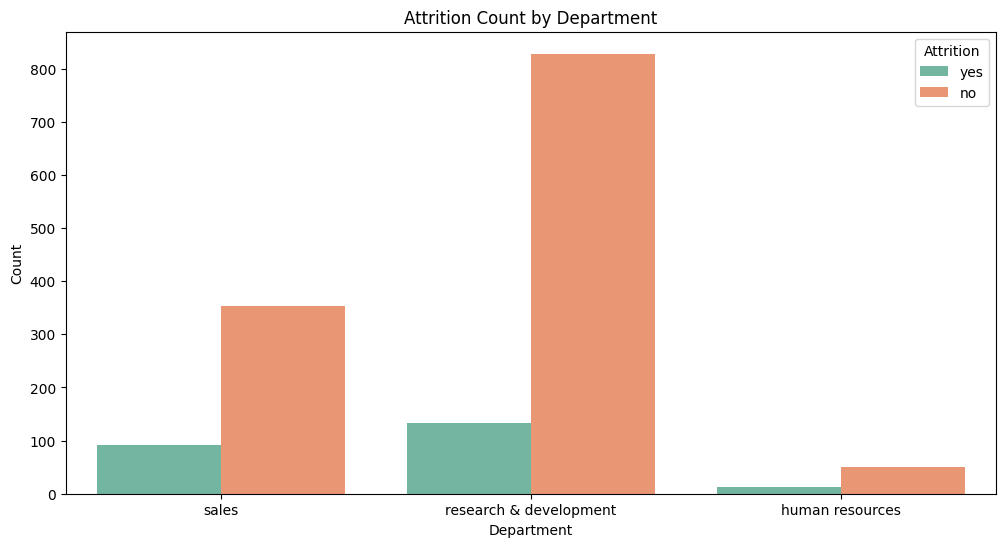

In [84]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='Department',
    hue='Attrition',
    data=df,
    palette='Set2'
)
plt.title('Attrition Count by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

In [85]:
#Research & Development department has the highest employee count.
#Even though R&D has high strength, attrition is also highest here.
#HR has the lowest employee count, and very few people left.
# Sales department also shows a visible count of attrition.
#This suggests that attrition is not isolated to small departments — even large departments like R&D have significant attrition issues.

In [86]:
# output:
#Employees who travel rarely form the largest group and also show the highest attrition count.
#Travel_Frequently group shows a noticeable level of attrition despite being a smaller group.
#Very few people are in the Non-Travel category, and attrition in this group is low.
#This suggests that frequent or even occasional travel might be linked to higher employee attrition.
#Travel-related stress or work-life imbalance could be potential reasons.

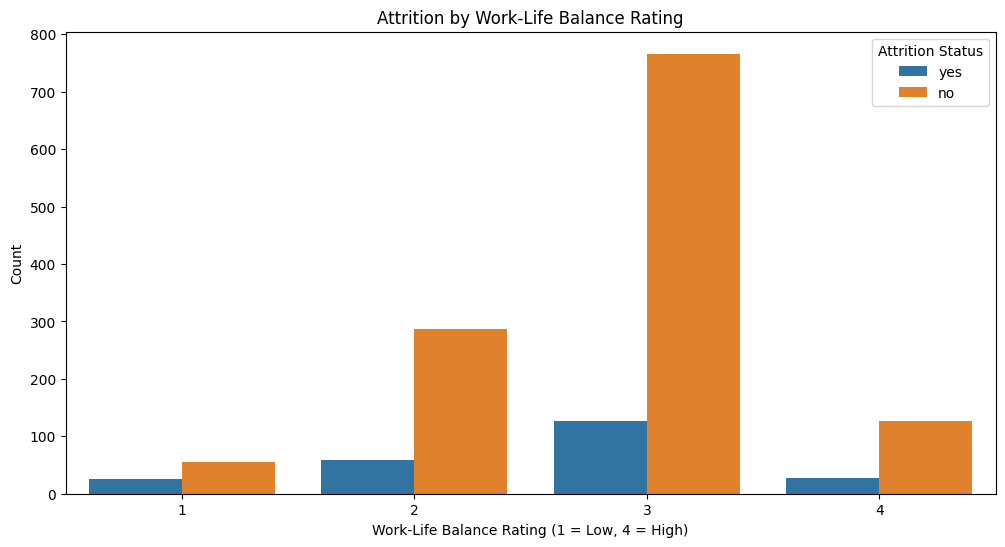

In [87]:
plt.figure(figsize=(12, 6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, order=[1, 2, 3, 4])
plt.title('Attrition by Work-Life Balance Rating')
plt.xlabel('Work-Life Balance Rating (1 = Low, 4 = High)')
plt.ylabel('Count')
plt.legend(title='Attrition Status')
plt.show()

# Explanation (output-based):
# - Majority of employees fall in categories 2 and 3.
# - Highest attrition ("Yes") is seen in category 3, followed by 2.
# - Very few employees rated 1 and 4, and attrition is lowest there.
# - This may indicate employees rating work-life balance as moderate still choose to leave, possibly due to unaddressed dissatisfaction.
# - Encourages reviewing company policies for improving perceived work-life balance.


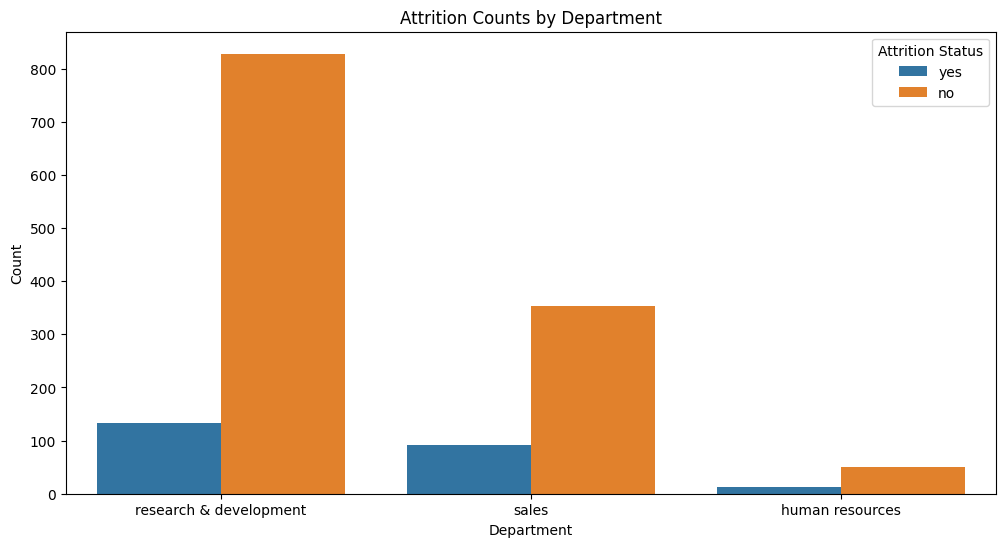

In [88]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='Attrition', data=df,
              order=['research & development', 'sales', 'human resources'])
plt.title('Attrition Counts by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition Status')
plt.show()

In [89]:
# Output:
# - Research & Development has the highest number of employees and also the most attrition cases.
# - Sales has a moderate size and also notable attrition cases.
# - Human Resources has the least number of employees but a relatively high attrition rate compared to its size.
# - Indicates that attrition is not limited to one department—each might need customized retention strategies.

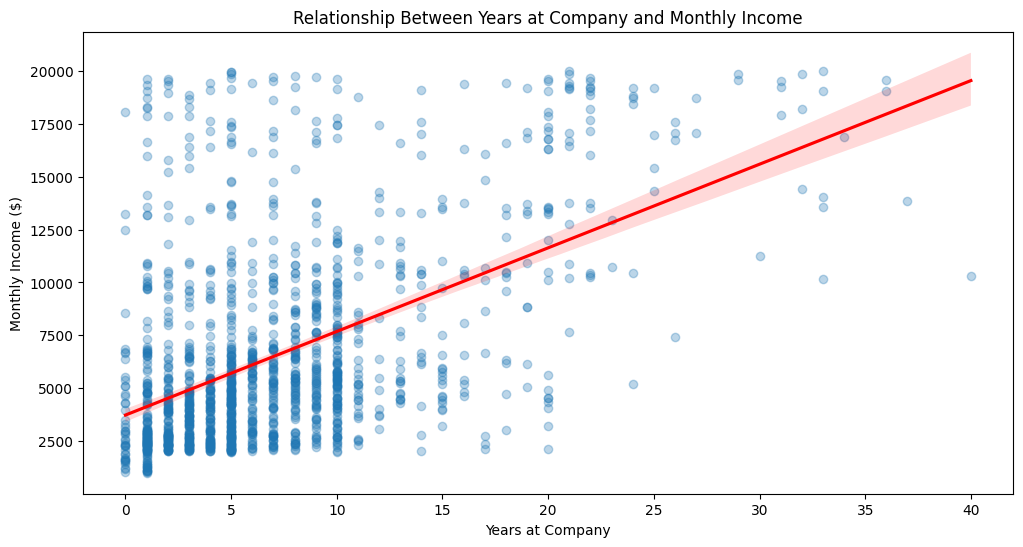

In [90]:
# Scatter plot to observe the relationship between tenure and income
plt.figure(figsize=(12, 6))
sns.regplot(x='YearsAtCompany', y='MonthlyIncome', data=df, 
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Relationship Between Years at Company and Monthly Income')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income ($)')
plt.show()

# Explanation (output-based):
# - There is a general positive trend — as 'YearsAtCompany' increases, 'MonthlyIncome' tends to increase.
# - However, we also observe wide variance, especially for lower tenure employees — some earn very high despite low years at company.
# - This may indicate promotions, high job levels, or specialized roles with early high compensation.
# - Red regression line shows a weak but consistent upward linear relationship.

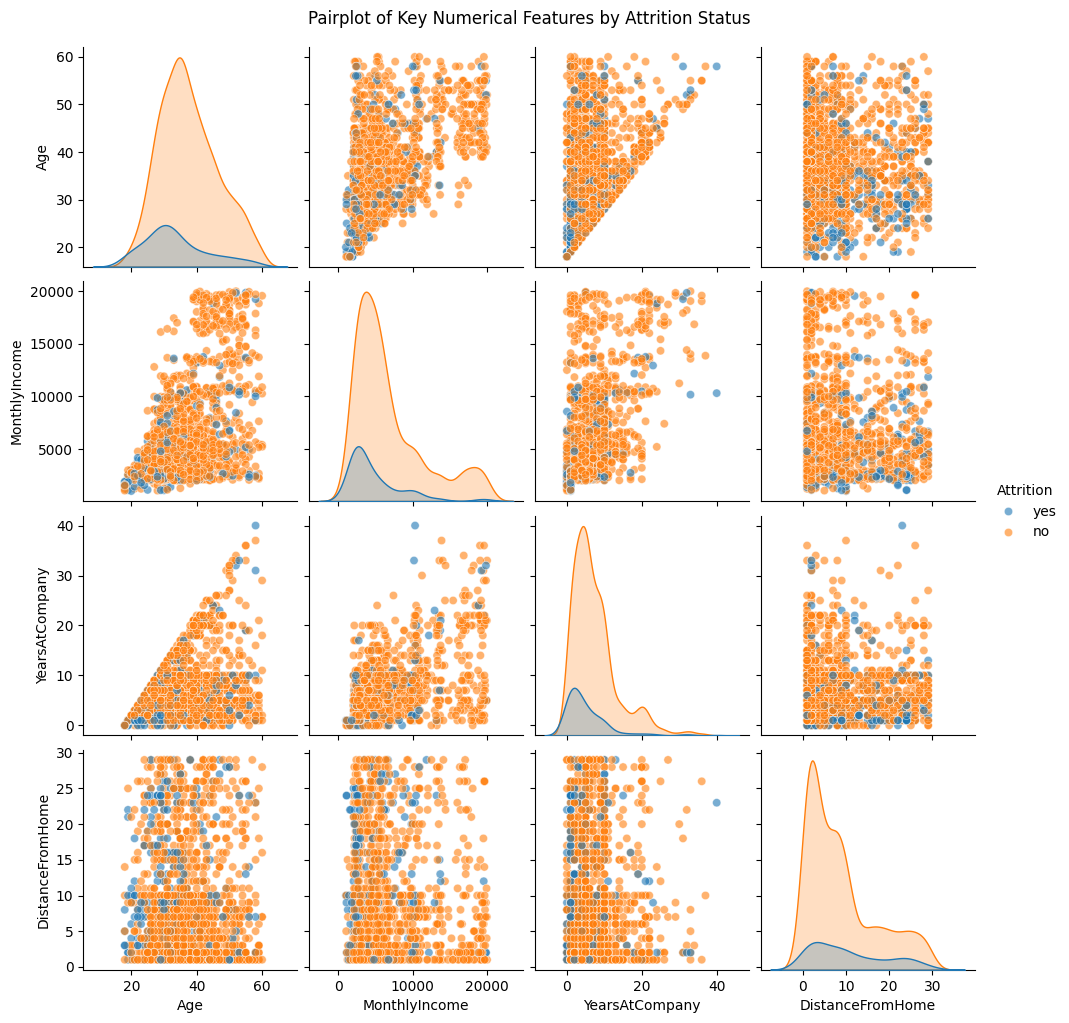

In [91]:
# Pairplot to analyze pairwise relationships among selected numerical features
pairplot_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome', 'Attrition']
sns.pairplot(df[pairplot_cols], hue='Attrition', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Key Numerical Features by Attrition Status', y=1.02)
plt.show()

# Explanation (output-based):
# - Each diagonal plot shows the distribution (KDE) of a single feature for both Attrition categories.
# - The scatter plots show how two variables relate and how attrition is spread across that relationship.
# - For example:
#     - Age and MonthlyIncome are positively related (as age increases, so does income).
#     - Employees with higher 'DistanceFromHome' and lower 'YearsAtCompany' show more density in the "Yes" group.
#     - The color separation helps spot regions where 'Yes' attrition points cluster more.
# - Good for spotting multivariate trends and potential clusters for classification modeling.


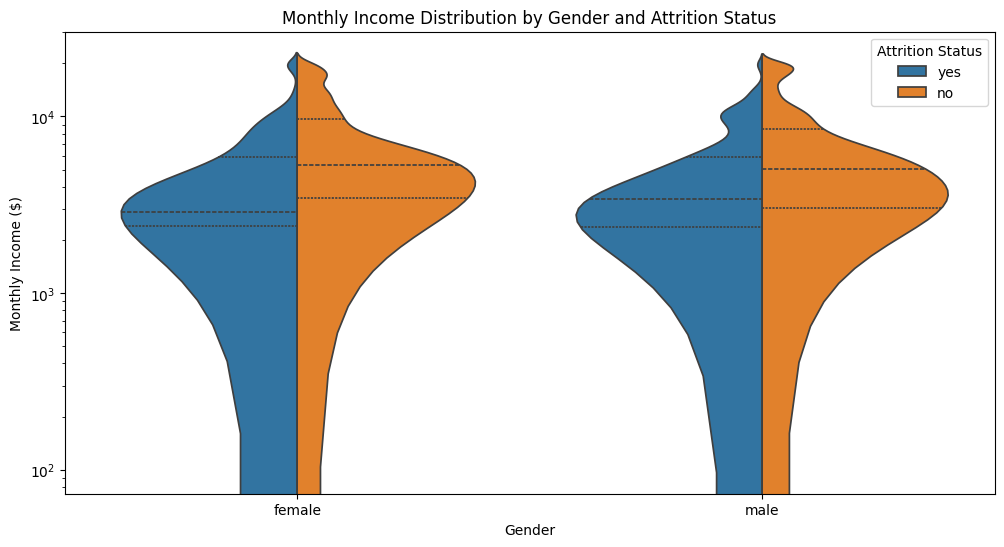

In [92]:
# Violin plot of Monthly Income split by Gender and Attrition
plt.figure(figsize=(12, 6))
sns.violinplot(x='Gender', y='MonthlyIncome', hue='Attrition', 
               data=df, split=True, inner='quartile')
plt.title('Monthly Income Distribution by Gender and Attrition Status')
plt.xlabel('Gender')
plt.ylabel('Monthly Income ($)')
plt.yscale('log')  # Helps visualize skewed income distribution
plt.legend(title='Attrition Status')
plt.show()

# Explanation (output-based):
# - This plot shows the full distribution of Monthly Income for both Male and Female employees.
# - The shape of each violin represents the density of data at different income levels.
# - Quartile lines (white) indicate median and interquartile ranges.
# - In both genders:
#     - Most employees fall under lower-to-mid income levels.
#     - Attrition (Yes) is slightly more spread out at lower income ranges.
# - Using log scale helps compress the long tail caused by very high incomes.
# - This chart helps assess whether income disparities across gender influence attrition behavior.

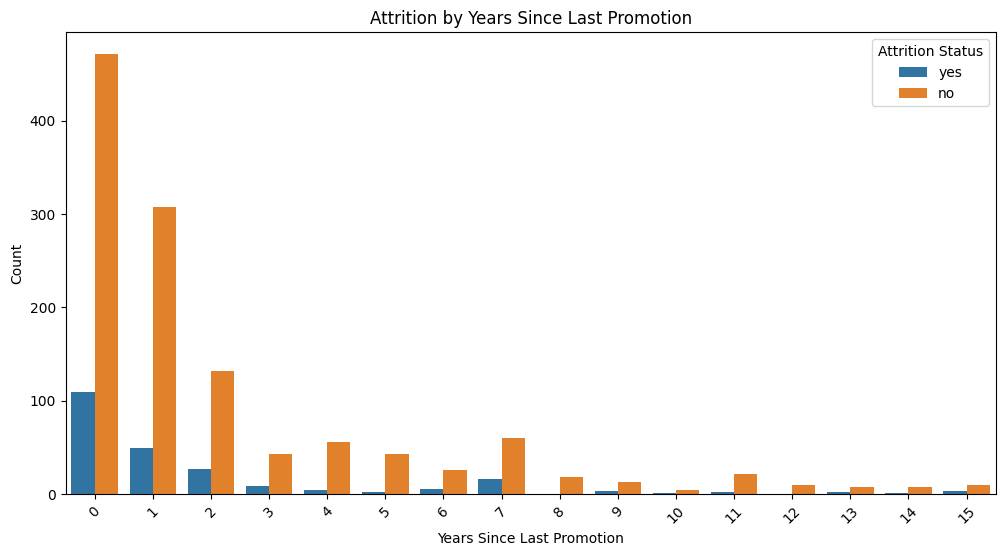

In [93]:
# Years since last promotion vs Attrition
plt.figure(figsize=(12, 6))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df, order=sorted(df['YearsSinceLastPromotion'].unique()))
plt.title('Attrition by Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Count')
plt.legend(title='Attrition Status')
plt.xticks(rotation=45)
plt.show()
# Explanation (OUTPUT-BASED):
# - Shows how employee attrition varies based on how many years it’s been since last promotion
# - Majority of employees who left had either 0 or 1 year since last promotion
# - Another spike in attrition appears around 4-5 years of no promotion
# - Helps us identify possible "critical promotion windows" where employees expect growth
# - Insight: Delayed promotions or stagnation can cause employee dissatisfaction and lead to exits

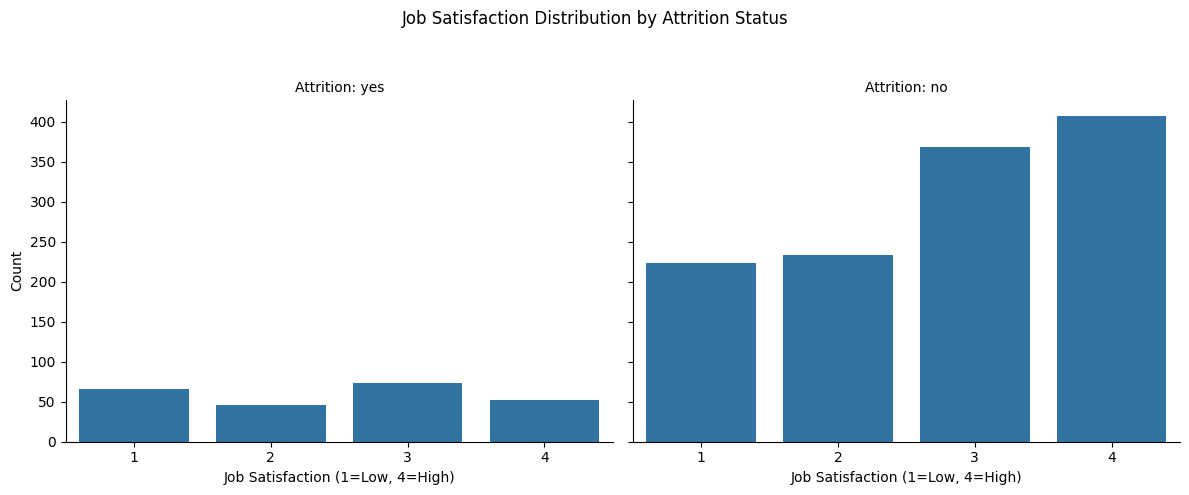

In [94]:
# Job Satisfaction by Attrition using FacetGrid
g = sns.FacetGrid(df, col='Attrition', height=5, aspect=1.2)
g.map(sns.countplot, 'JobSatisfaction', order=[1, 2, 3, 4])
g.set_axis_labels('Job Satisfaction (1=Low, 4=High)', 'Count')
g.set_titles('Attrition: {col_name}')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Job Satisfaction Distribution by Attrition Status')
plt.show()

# Explanation (OUTPUT-BASED):
# - Two side-by-side plots showing distribution of JobSatisfaction for both Yes and No Attrition
# - Most employees fall in rating 2 or 3, but:
#     - Attrition 'Yes' is noticeably higher in lower satisfaction categories (especially 2)
#     - Very few people with satisfaction 4 left
# - Clear trend: low job satisfaction increases the chances of attrition
# - Insight: Improving job satisfaction could reduce attrition rates

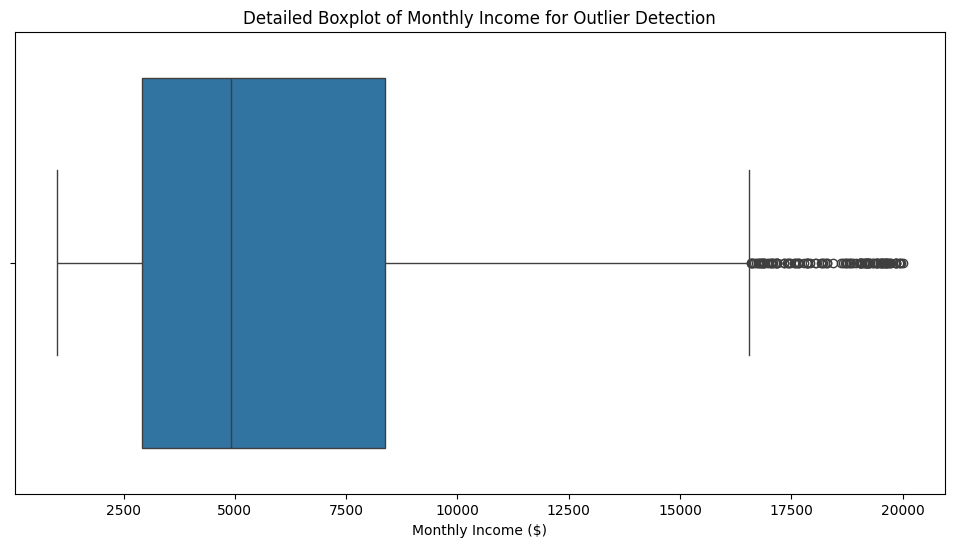

Monthly Income Outlier Thresholds:
Lower Bound: $-5291.00
Upper Bound: $16581.00


In [95]:
# Boxplot for MonthlyIncome to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='MonthlyIncome', data=df)
plt.title('Detailed Boxplot of Monthly Income for Outlier Detection')
plt.xlabel('Monthly Income ($)')
plt.show()

# Outlier threshold calculation using IQR (Interquartile Range)
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Monthly Income Outlier Thresholds:")
print(f"Lower Bound: ${lower_bound:.2f}")
print(f"Upper Bound: ${upper_bound:.2f}")


In [96]:
#MonthlyIncome z-score
df['Income_Z'] = zscore(df['MonthlyIncome'])
df[df['Income_Z'].abs() > 2.5][['MonthlyIncome', 'TotalWorkingYears', 'JobLevel', 'JobRole']]# These are the suspicious rows

MonthlyIncome  TotalWorkingYears  JobLevel            JobRole
25            19094                 26         5            manager
29            18947                 22         5            manager
45            19545                 23         5  research director
62            18740                 29         5  research director
105           18844                 30         5            manager
...             ...                ...       ...                ...
1331          19665                 29         5  research director
1377          19161                 28         5  research director
1401          19636                 35         5            manager
1437          19431                 21         5            manager
1443          18880                 24         5            manager

[63 rows x 4 columns]

In [97]:
#63 rows were flagged as outliers based on Z-score.
#However, most of them were JobLevel 5 roles like "Manager" or "Research Director" with high experience.
#Their high income was valid, not erroneous.

In [98]:
# Manually checking sample flagged rows
# Most of them had JobLevel = 5 and 20+ years of experience

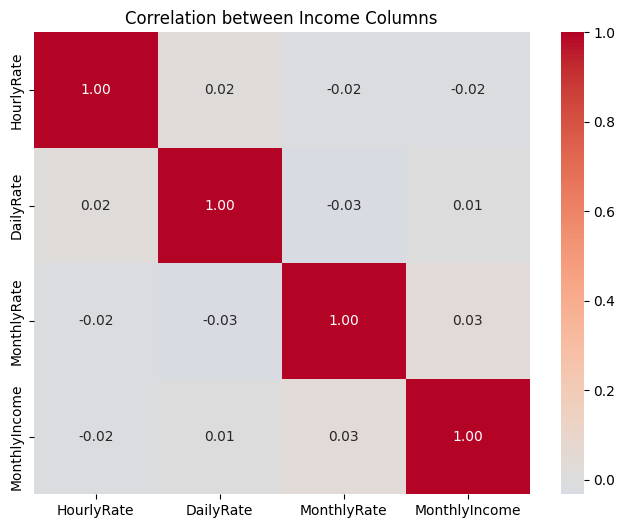

In [99]:
# Creating a heatmap to visualize correlation between rate-based columns and MonthlyIncome
corr_cols = ['HourlyRate', 'DailyRate', 'MonthlyRate', 'MonthlyIncome']
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap = 'coolwarm',center = 0, fmt='.2f')#fmt for 2 decimal values only 0.01, 0.02 this way
plt.title('Correlation between Income Columns')
plt.show()

In [100]:
#Based on correlation heatmap, HourlyRate, DailyRate, and MonthlyRate showed negligible correlation with 
#MonthlyIncome (near zero). Hence, they were not contributing meaningful information and were removed to
#reduce dimensionality and noise.

In [101]:
#Hence lets drop the unwanted columns
df.drop(['HourlyRate', 'DailyRate', 'MonthlyRate', 'Income_Z'], axis=1, inplace=True)

In [102]:
df

Age Attrition     BusinessTravel              Department  \
0      41       yes      travel_rarely                   sales   
1      49        no  travel_frequently  research & development   
2      37       yes      travel_rarely  research & development   
3      33        no  travel_frequently  research & development   
4      27        no      travel_rarely  research & development   
...   ...       ...                ...                     ...   
1465   36        no  travel_frequently  research & development   
1466   39        no      travel_rarely  research & development   
1467   27        no      travel_rarely  research & development   
1468   49        no  travel_frequently                   sales   
1469   34        no      travel_rarely  research & development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  life sciences                        2   
1                    8          1  life sciences                        3   
2                    2          2          other                        4   
3                    3          4  life sciences                        4   
4                    2          1        medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        medical                        3   
1466                 6          1        medical                        4   
1467                 4          3  life sciences                        2   
1468                 2          3        medical                        4   
1469                 8          3        medical                        2   

      Gender  JobInvolvement  ...  PerformanceRating RelationshipSatisfaction  \
0     female               3  ...                  3                        1   
1       male               2  ...                  4                        4   
2       male               2  ...                  3                        2   
3     female               3  ...                  3                        3   
4       male               3  ...                  3                        4   
...      ...             ...  ...                ...                      ...   
1465    male               4  ...                  3                        3   
1466    male               2  ...                  3                        1   
1467    male               4  ...                  4                        2   
1468    male               2  ...                  3                        4   
1469    male               4  ...                  3                        1   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0                 8                      0   
1                    1                10                      3   
2                    0                 7                      3   
3                    0                 8                      3   
4                    1                 6                      3   
...                ...               ...                    ...   
1465                 1                17                      3   
1466                 1                 9                      5   
1467                 1                 6                      0   
1468                 0                17                      3   
1469                 0                 6                      3   

      WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                   1              6                   4   
1                   3             10                   7   
2                   3              0                   0   
3                   3              8                   7   
4                   3              2                   2   
...               ...            ...                 ...   
1465                3              5                   2   
1466                3         

In [103]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [104]:
# Step 1: Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Step 2: Calculate Z-score for each numeric column
z_scores = np.abs(zscore(df[numeric_cols]))

# Step 3: Mark outliers where z-score > 2.5
outlier_mask = (z_scores > 2.5)

# Step 4: Count outliers per column
outliers_per_column = outlier_mask.sum(axis=0)

# Step 5: Print results
print("Outliers in each column (Z-score > 2.5):")
for col, count in zip(numeric_cols, outliers_per_column):
    print(f"{col}: {count} outliers")

Outliers in each column (Z-score > 2.5):
Age: 5 outliers
DistanceFromHome: 0 outliers
Education: 0 outliers
EnvironmentSatisfaction: 0 outliers
JobInvolvement: 0 outliers
JobLevel: 69 outliers
JobSatisfaction: 0 outliers
MonthlyIncome: 63 outliers
NumCompaniesWorked: 52 outliers
PercentSalaryHike: 18 outliers
PerformanceRating: 0 outliers
RelationshipSatisfaction: 0 outliers
StockOptionLevel: 85 outliers
TotalWorkingYears: 46 outliers
TrainingTimesLastYear: 0 outliers
WorkLifeBalance: 0 outliers
YearsAtCompany: 37 outliers
YearsInCurrentRole: 32 outliers
YearsSinceLastPromotion: 66 outliers
YearsWithCurrManager: 19 outliers


In [105]:
# Outlier Validity Explanation (Z-Score based):
# Age: Outliers may represent very young (freshers) or older employees (close to retirement), which are realistic scenarios.
# DistanceFromHome: No outliers detected, hence nothing unusual.
# Education: No outliers; data distribution is normal across education levels.
# EnvironmentSatisfaction: No outliers; values are within the expected scale (1-4).
# JobInvolvement: No outliers; involvement scores follow the standard scale (1-4).
# JobLevel: Outliers mostly at level 5, which is expected since very few employees are in senior positions (managers/directors).
# JobSatisfaction: No outliers; values are distributed well within 1-4.
# MonthlyIncome: High-income outliers are valid — they represent senior roles like directors or experienced professionals.
# NumCompaniesWorked: Outliers with many companies worked are valid; they may reflect job-hoppers or consultants.
# PercentSalaryHike: Some employees may have received exceptional hikes due to performance or promotions.
# PerformanceRating: No outliers; values are normally spread across the defined scale.
# RelationshipSatisfaction: No outliers; values fall within expected range (1-4).
# StockOptionLevel: Outliers (like level 3) are rare but valid, representing high-level perks.
# TotalWorkingYears: Outliers reflect very experienced employees — possible and valid in large companies.
# TrainingTimesLastYear: No outliers; training counts are within reasonable limits.
# WorkLifeBalance: No outliers; values adhere to the normal 1-4 scale.
# YearsAtCompany: Outliers show either very new or long-tenure employees — both are possible.
# YearsInCurrentRole: Similar to above — some employees stay long in one role, others are new.
# YearsSinceLastPromotion: High values indicate employees who haven’t been promoted for a long time — not unusual.
# YearsWithCurrManager: High or low durations with the same manager are common and valid.

In [106]:
#Now Feature scaling
# Label Encoding for binary columns
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])   # No=0, Yes=1
df['Gender'] = le.fit_transform(df['Gender'])         # Female=0, Male=1
df['OverTime'] = le.fit_transform(df['OverTime'])     # No=0, Yes=1

# One-Hot Encoding for multi-category nominal columns
df = pd.get_dummies(df, columns=[
    'BusinessTravel', 
    'Department', 
    'EducationField', 
    'JobRole', 
    'MaritalStatus'
], drop_first=True)

In [107]:
df.columns.to_list()

['Age',
 'Attrition',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_travel_frequently',
 'BusinessTravel_travel_rarely',
 'Department_research & development',
 'Department_sales',
 'EducationField_life sciences',
 'EducationField_marketing',
 'EducationField_medical',
 'EducationField_other',
 'EducationField_technical degree',
 'JobRole_human resources',
 'JobRole_laboratory technician',
 'JobRole_manager',
 'JobRole_manufacturing director',
 'JobRole_research director',
 'JobRole_research scientist',
 'JobRole_sales executive',
 'JobRole_sales representative',
 'MaritalStatus_married

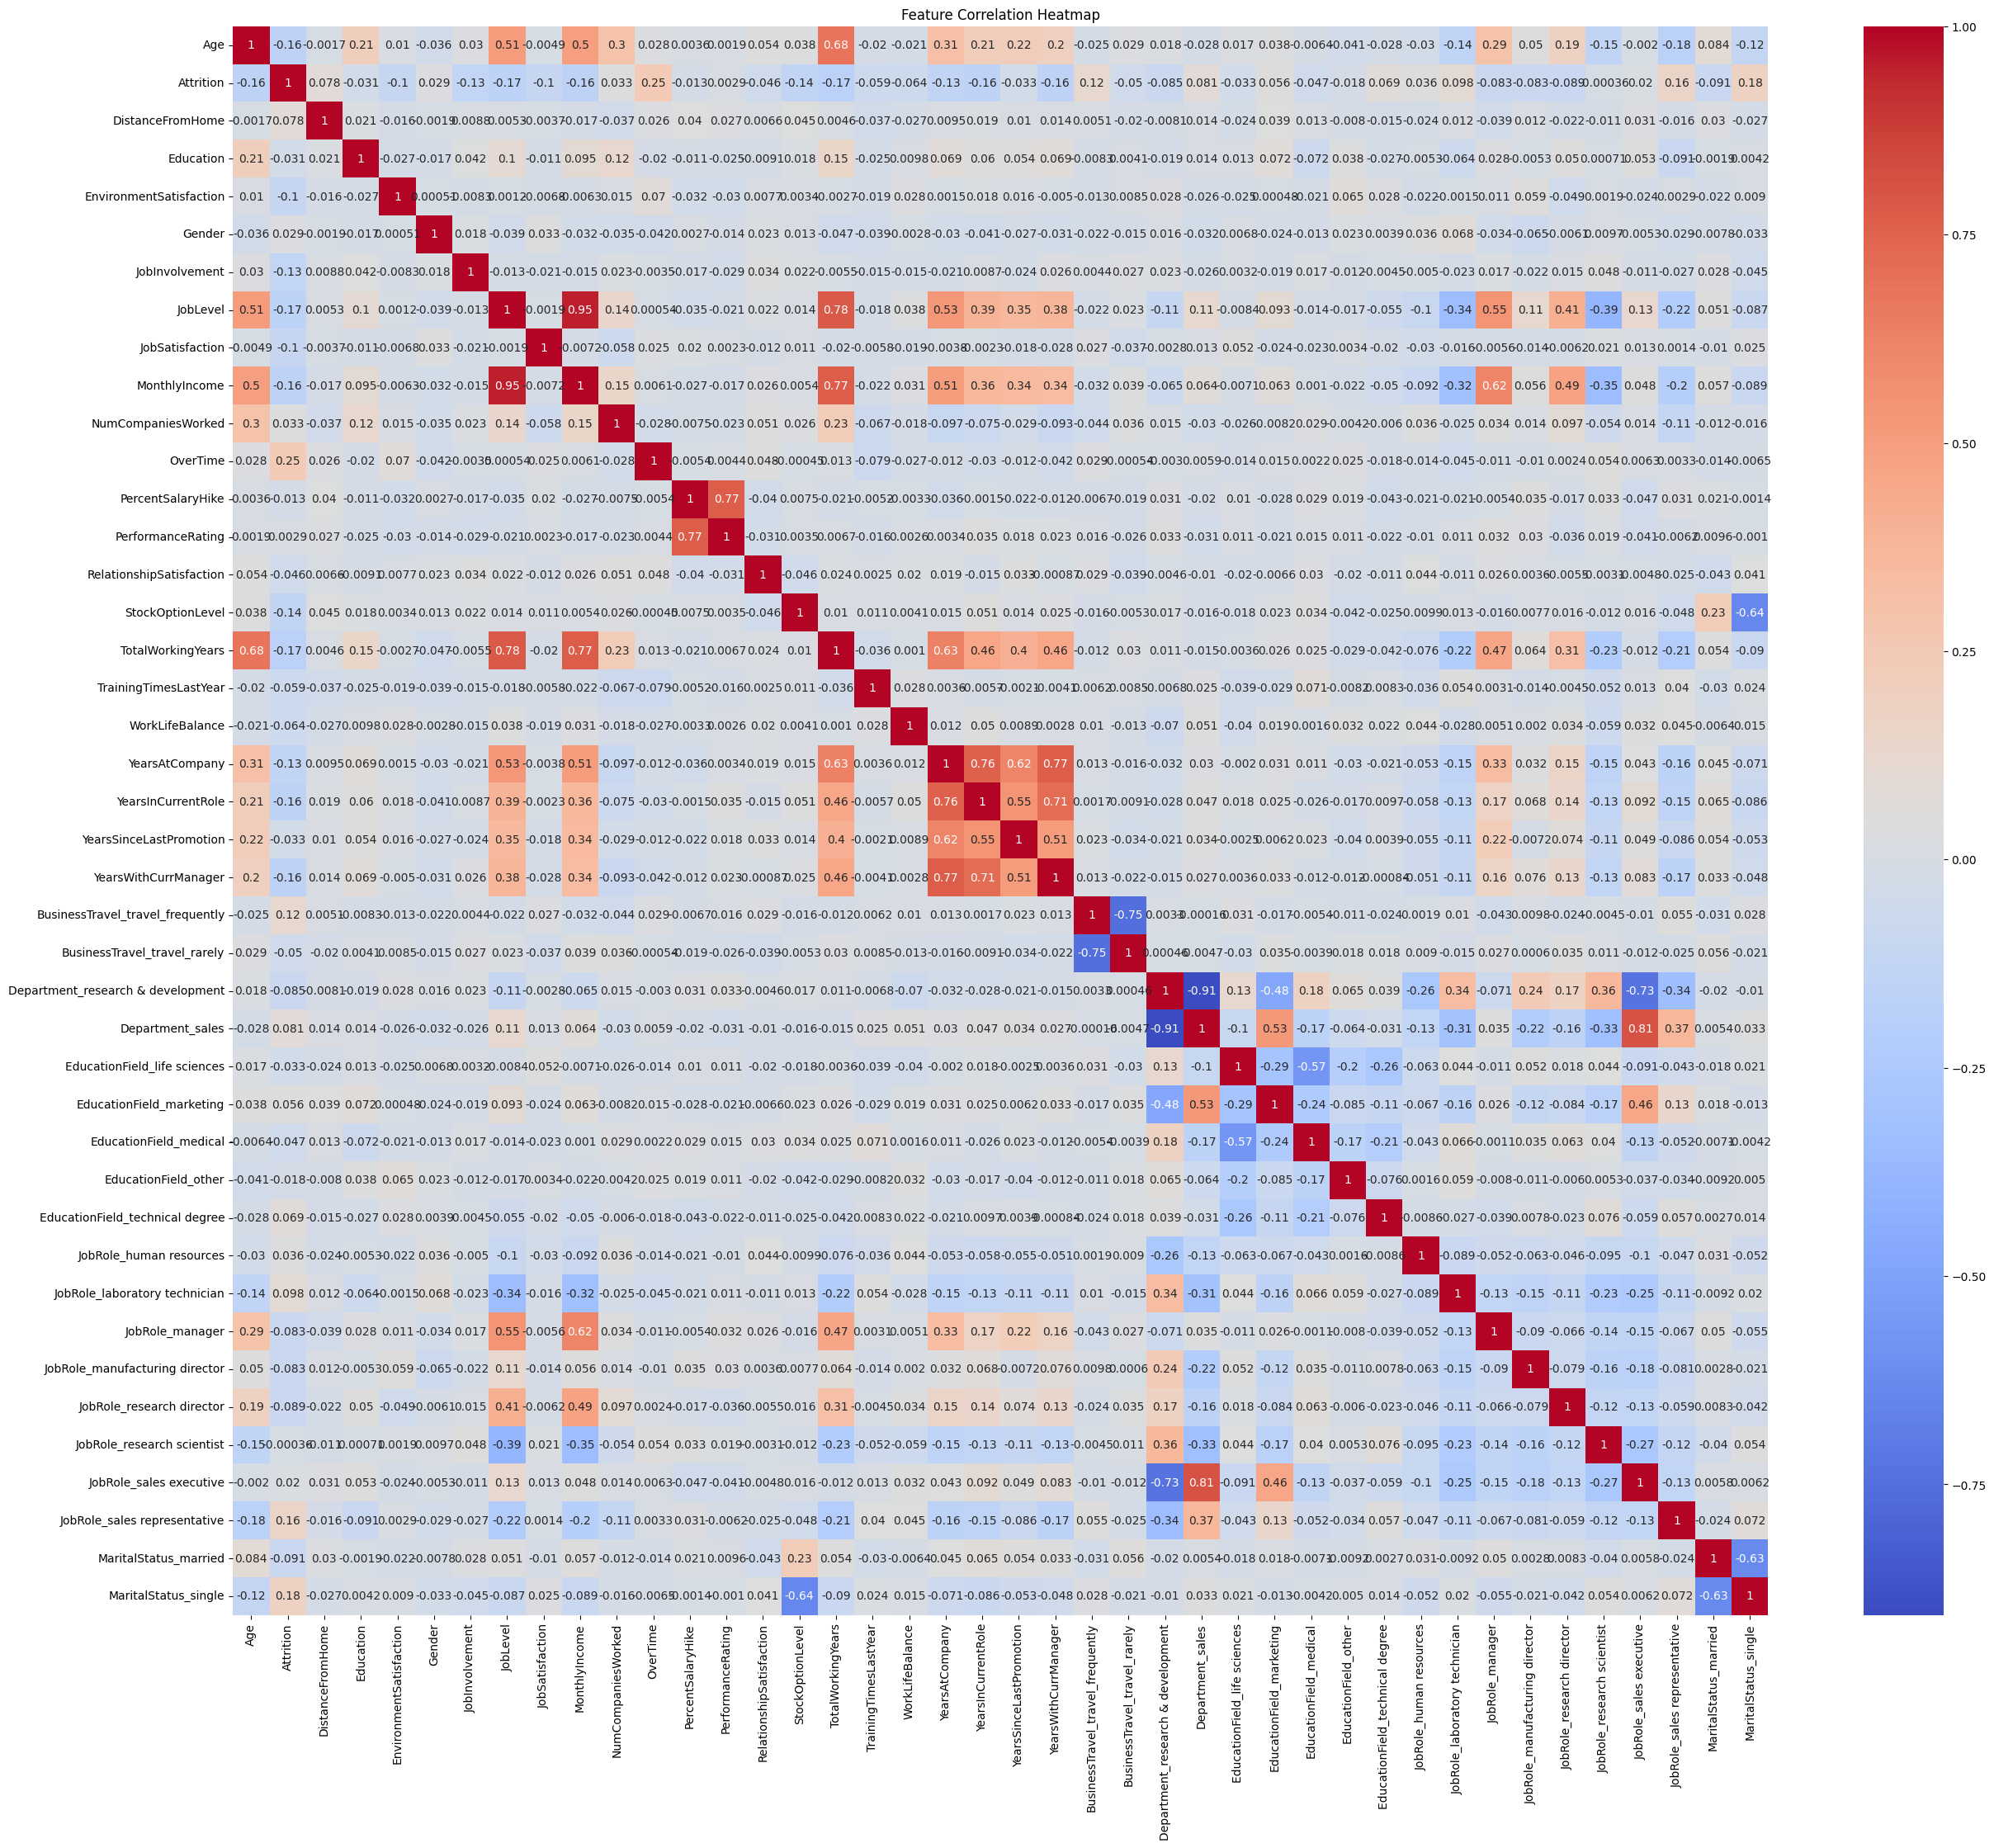

In [108]:
#Feature Selection
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")

# First save the image
#plt.savefig("heatmap_output.pdf", dpi=300, bbox_inches='tight')   # Save as PDF
plt.show()

In [109]:
# Dropping redundant or low-value features based on correlation and business logic
cols_to_drop = [
    'JobLevel',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'StockOptionLevel',
    'Education'
]
df.drop(columns=cols_to_drop, inplace=True)

In [110]:
# -----------------------------------------------
# 📝 Why These Columns Were Dropped:

# 1. JobLevel:
#    - Very high correlation (~0.95) with MonthlyIncome.
#    - MonthlyIncome is continuous and gives more detailed financial info.
#    - Keeping both creates multicollinearity. So, JobLevel dropped.

# 2. YearsInCurrentRole:
#    - Highly correlated with YearsAtCompany and YearsWithCurrManager.
#    - Adds redundancy, doesn't bring unique signal. Dropped.

# 3. YearsSinceLastPromotion:
#    - Correlated with other tenure-based columns.
#    - Model can learn similar info from YearsAtCompany, so dropped.

# 4. StockOptionLevel:
#    - Low correlation with Attrition and other features.
#    - Less variation in data. Domain-wise less impactful on leaving behavior.

# 5. Education:
#    - Categorical scale (1-5), already represented better through EducationField.
#    - EducationField gives broader context of qualification, so Education removed.

# ✅ Conclusion:
# This helps reduce dimensionality, multicollinearity, and noise.
# Final set now has cleaner, more informative features for the model.
# -----------------------------------------------

In [111]:
print(df.describe())

               Age    Attrition  DistanceFromHome  EnvironmentSatisfaction  \
count  1470.000000  1470.000000       1470.000000              1470.000000   
mean     36.923810     0.161224          9.192517                 2.721769   
std       9.135373     0.367863          8.106864                 1.093082   
min      18.000000     0.000000          1.000000                 1.000000   
25%      30.000000     0.000000          2.000000                 2.000000   
50%      36.000000     0.000000          7.000000                 3.000000   
75%      43.000000     0.000000         14.000000                 4.000000   
max      60.000000     1.000000         29.000000                 4.000000   

            Gender  JobInvolvement  JobSatisfaction  MonthlyIncome  \
count  1470.000000     1470.000000      1470.000000    1470.000000   
mean      0.600000        2.729932         2.728571    6502.931293   
std       0.490065        0.711561         1.102846    4707.956783   
min       0.00000

In [112]:
X = df.drop('Attrition', axis=1) #input variable
y = df['Attrition'] #target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [113]:

# Columns to scale
scale_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany']

# Save before scaling for plotting
before_scaling = X_train[scale_cols].copy()

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])

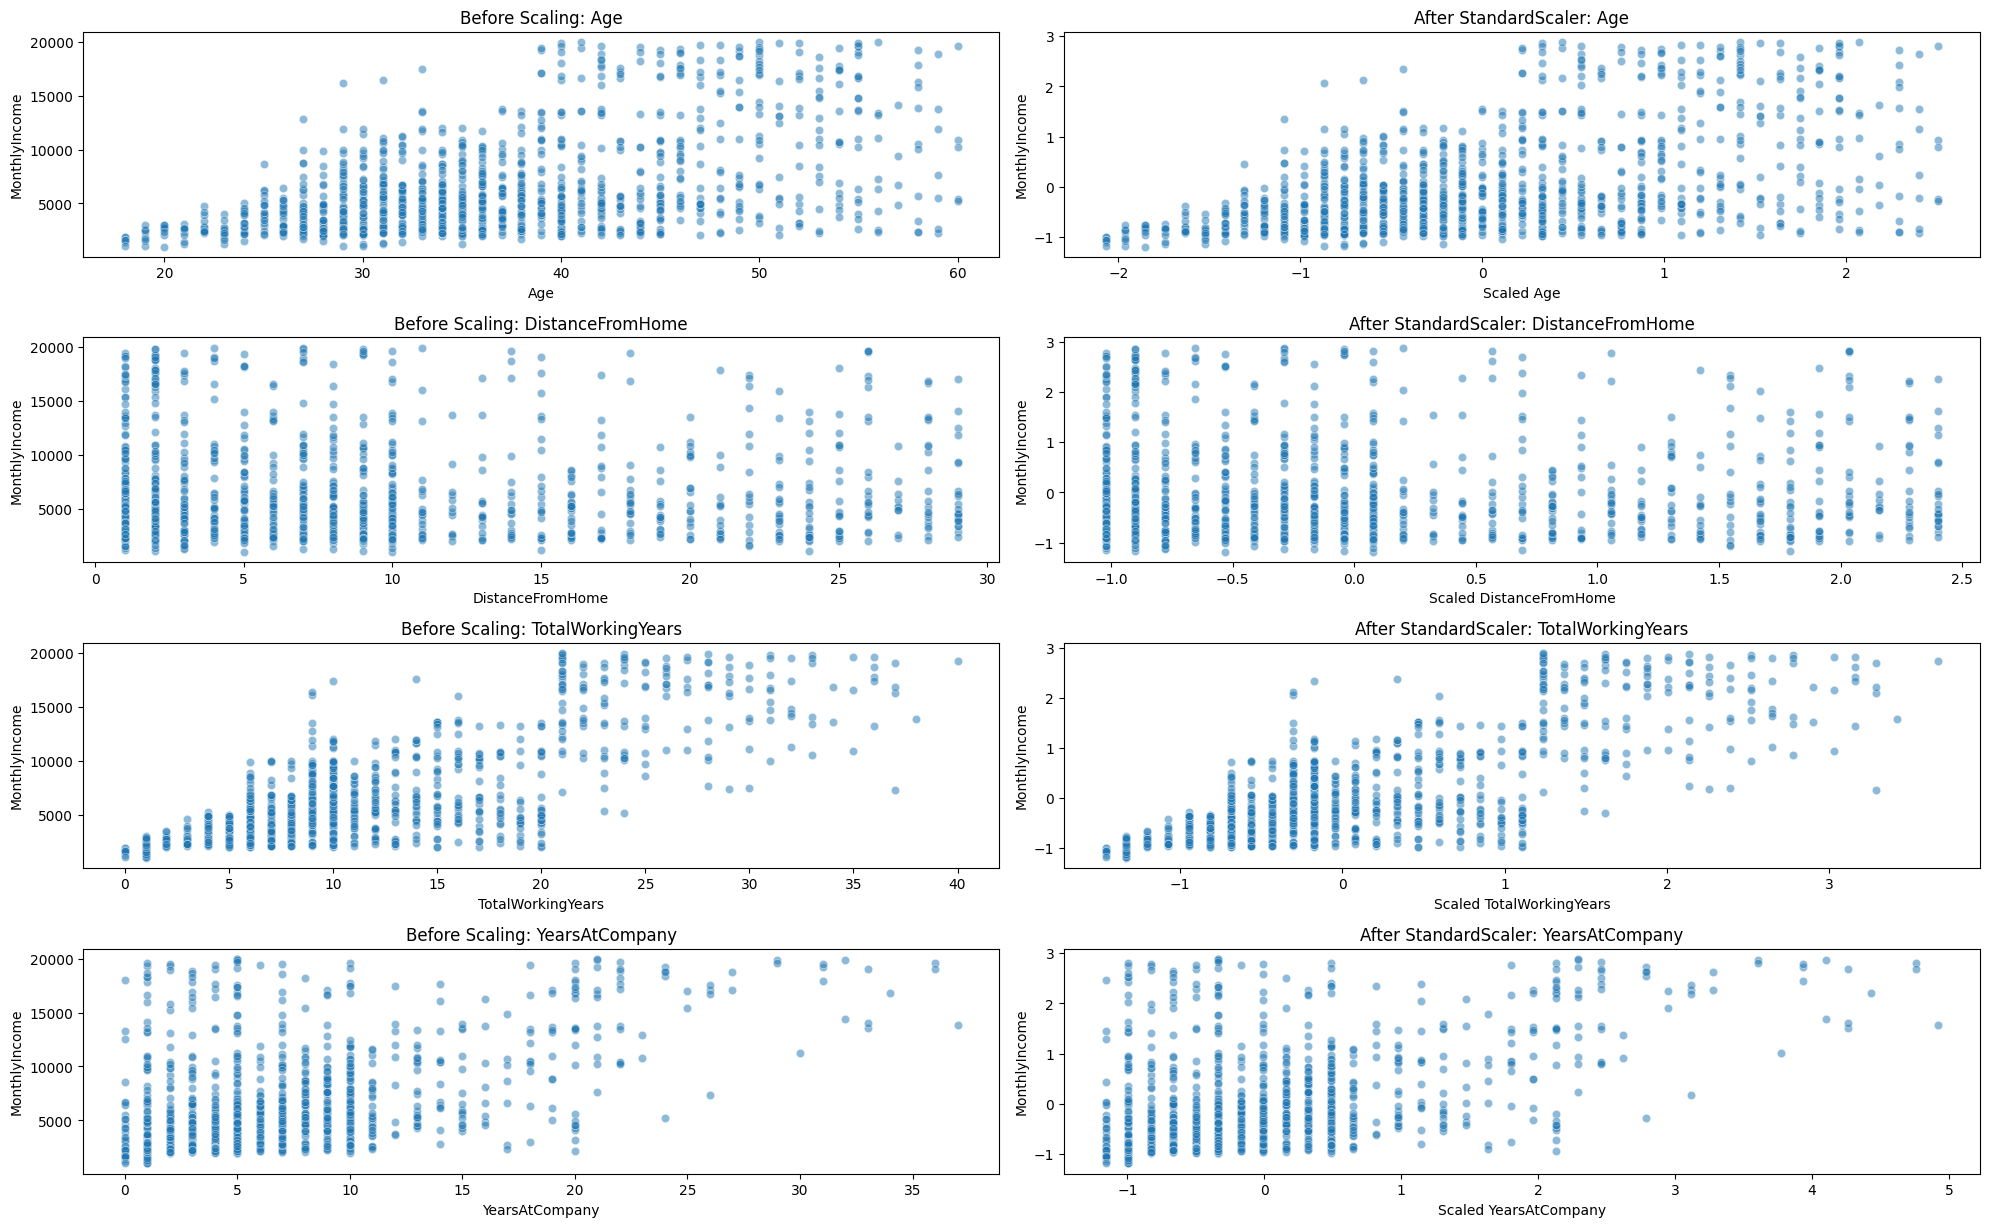

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = ['Age', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany']
# Set up the plot
plt.figure(figsize=(20, 15))

# Create before-after comparison for each column
for i, col in enumerate(columns):
    # Before scaling
    plt.subplot(len(scale_cols), 2, 2*i+1)
    sns.scatterplot(x=before_scaling[col], y=X_train['MonthlyIncome'], alpha=0.5)
    plt.title(f"Before Scaling: {col}")
    plt.xlabel(col)
    
    # After scaling
    plt.subplot(len(scale_cols), 2, 2*i+2)
    sns.scatterplot(x=X_train_scaled[col], y=X_train_scaled['MonthlyIncome'], alpha=0.5)
    plt.title(f"After StandardScaler: {col}")
    plt.xlabel(f"Scaled {col}")

plt.tight_layout()
plt.show()

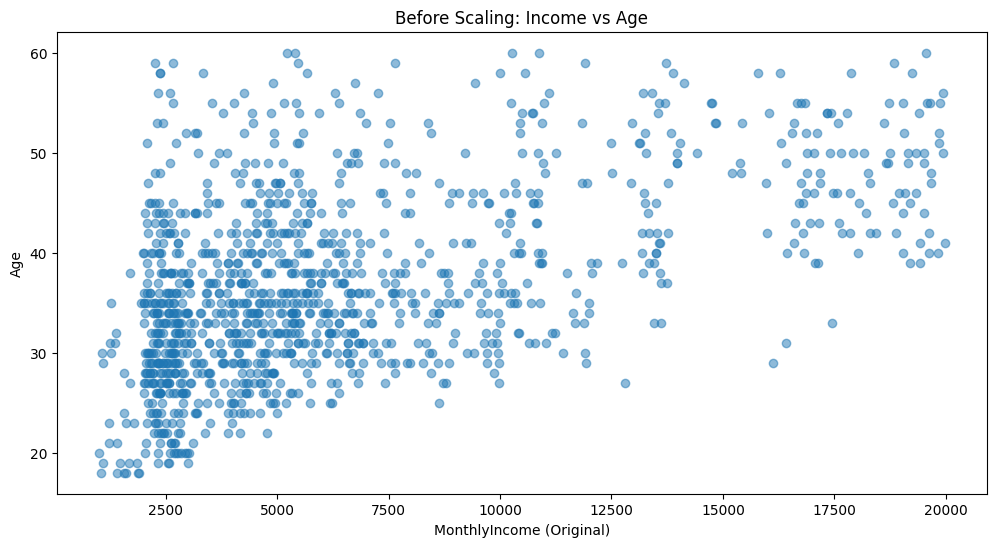

In [115]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train['MonthlyIncome'], X_train['Age'], alpha=0.5)
plt.title("Before Scaling: Income vs Age")
plt.xlabel("MonthlyIncome (Original)")
plt.ylabel("Age")
plt.show()

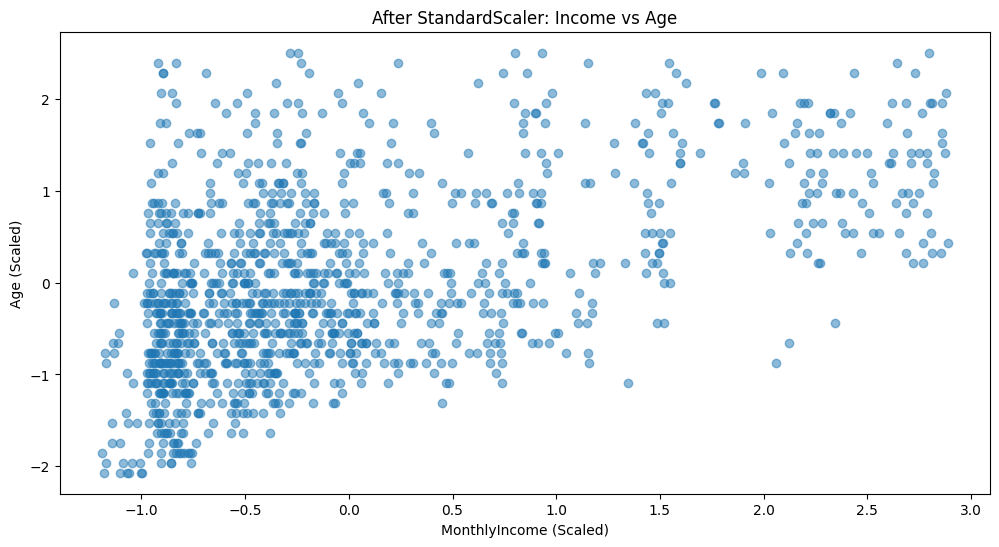

In [116]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train_scaled['MonthlyIncome'], X_train_scaled['Age'], alpha=0.5)
plt.title("After StandardScaler: Income vs Age")
plt.xlabel("MonthlyIncome (Scaled)")
plt.ylabel("Age (Scaled)")
plt.show()

In [117]:
print("Income Stats (Before): Mean =", X_train['MonthlyIncome'].mean(), "Std =", X_train['MonthlyIncome'].std())
print("Income Stats (After): Mean =", X_train_scaled['MonthlyIncome'].mean(), "Std =", X_train_scaled['MonthlyIncome'].std())

Income Stats (Before): Mean = 6544.024659863946 Std = 4653.743954982946
Income Stats (After): Mean = -7.930164461608261e-17 Std = 1.000425441414695


C:\Users\Himanshu Jangir\AppData\Local\Temp\ipykernel_9828\1372702215.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(before_scaling[scale_cols].values, labels=scale_cols)
C:\Users\Himanshu Jangir\AppData\Local\Temp\ipykernel_9828\1372702215.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_train_scaled[scale_cols].values, labels=scale_cols)


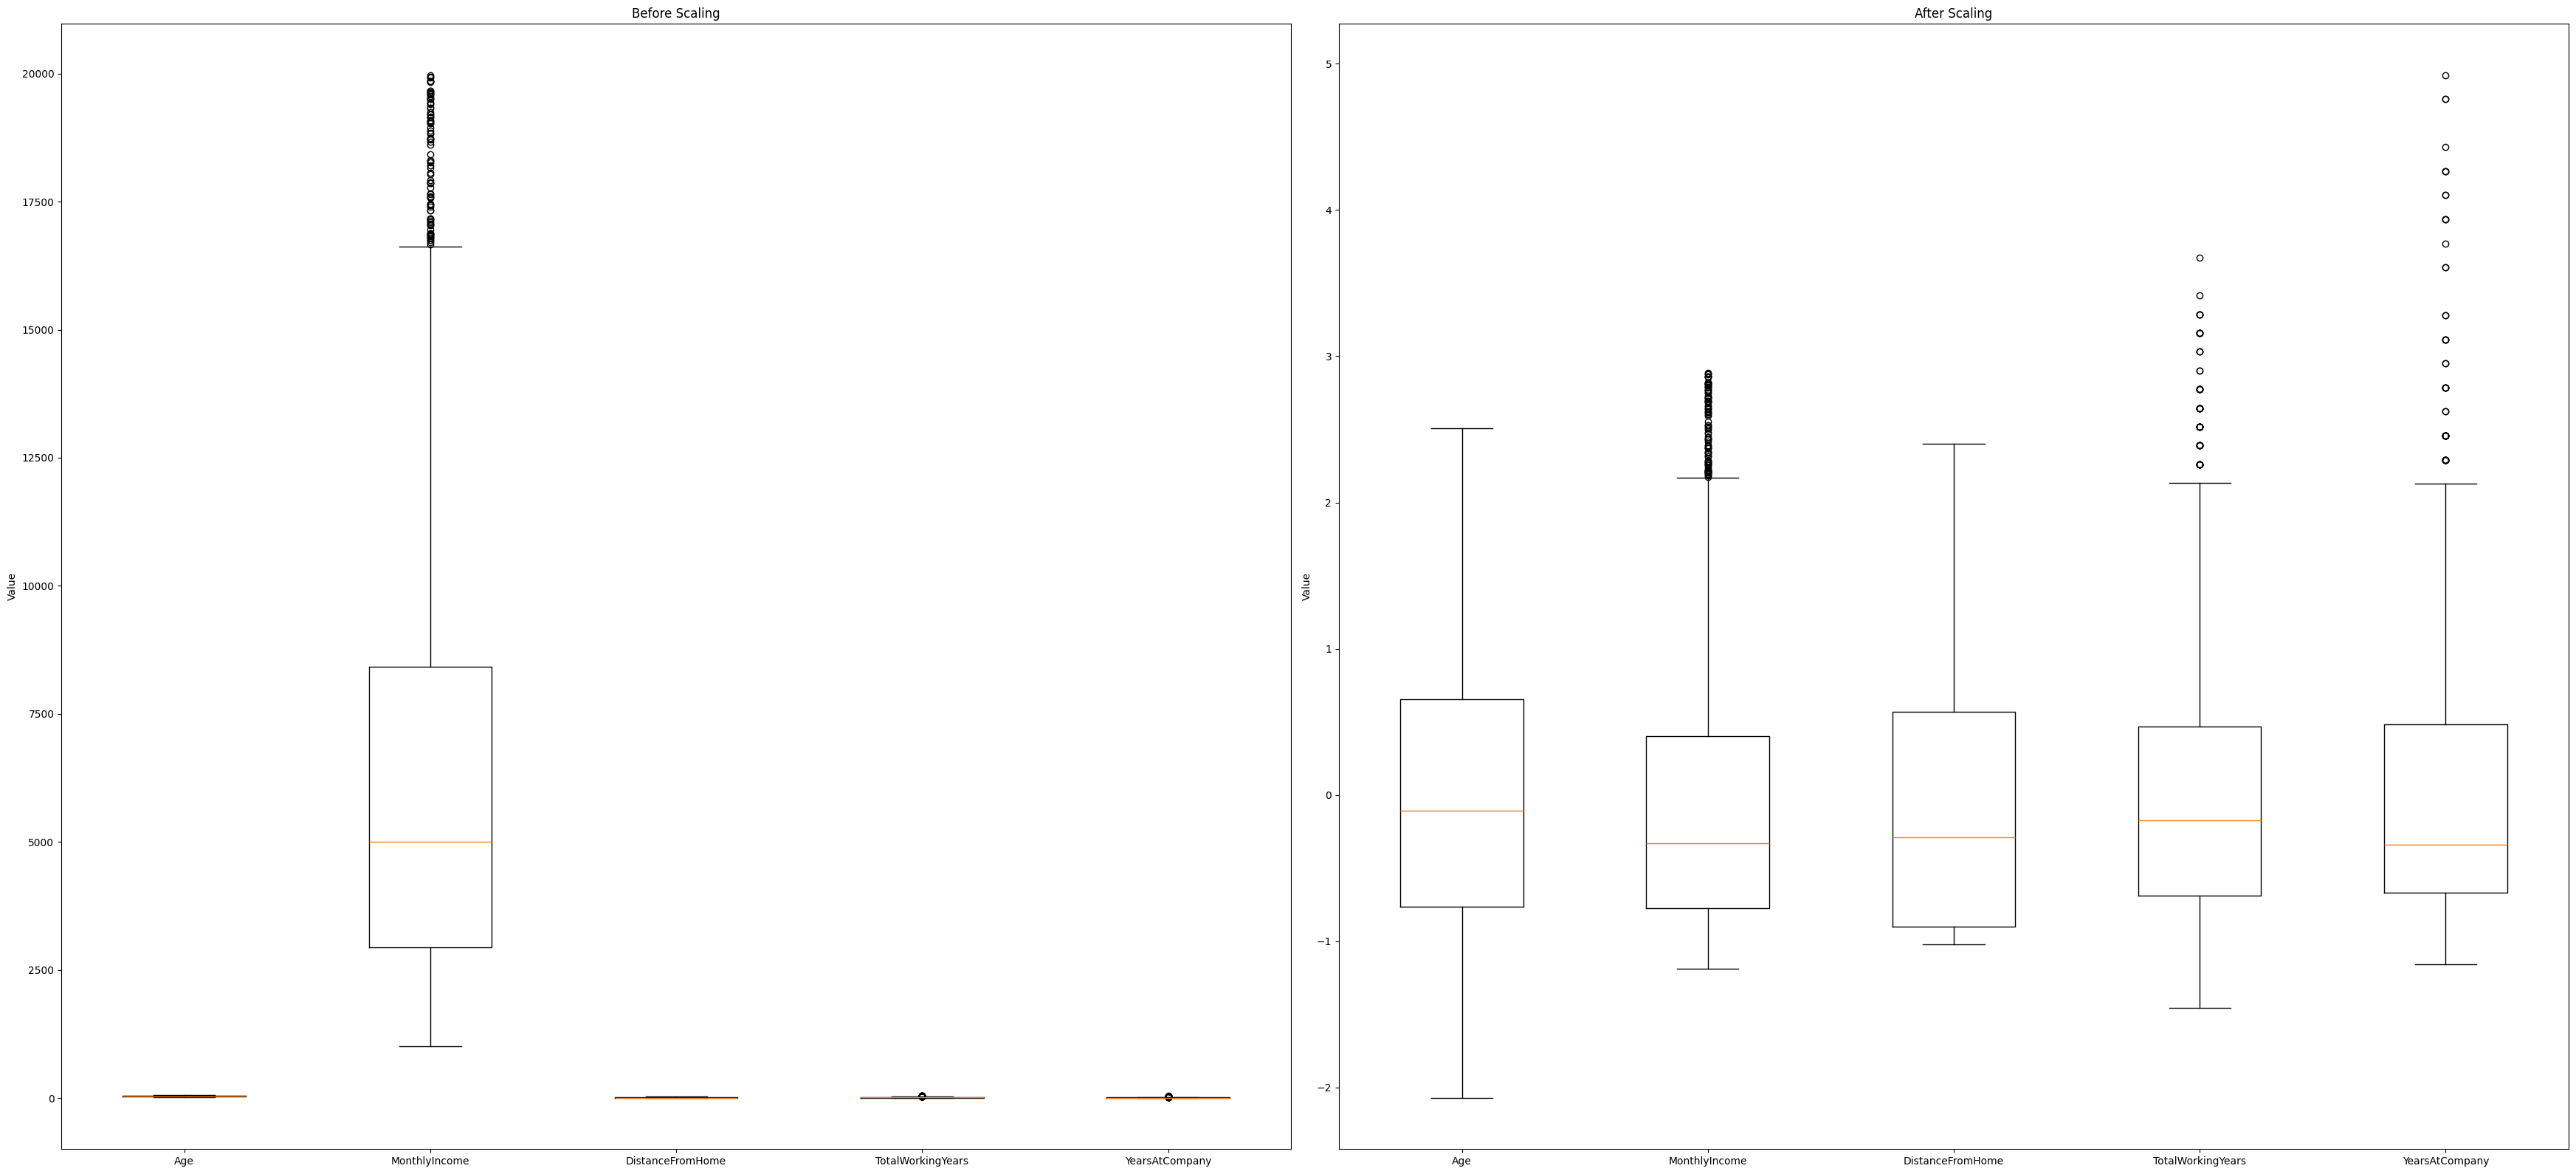

In [118]:

# Plotting before and after scaling
plt.figure(figsize=(35, 16))

# Before scaling
plt.subplot(1, 2, 1)
plt.title('Before Scaling')
plt.boxplot(before_scaling[scale_cols].values, labels=scale_cols)
plt.ylabel('Value')

# After scaling
plt.subplot(1, 2, 2)
plt.title('After Scaling')
plt.boxplot(X_train_scaled[scale_cols].values, labels=scale_cols)
plt.ylabel('Value')

plt.tight_layout()
plt.show()

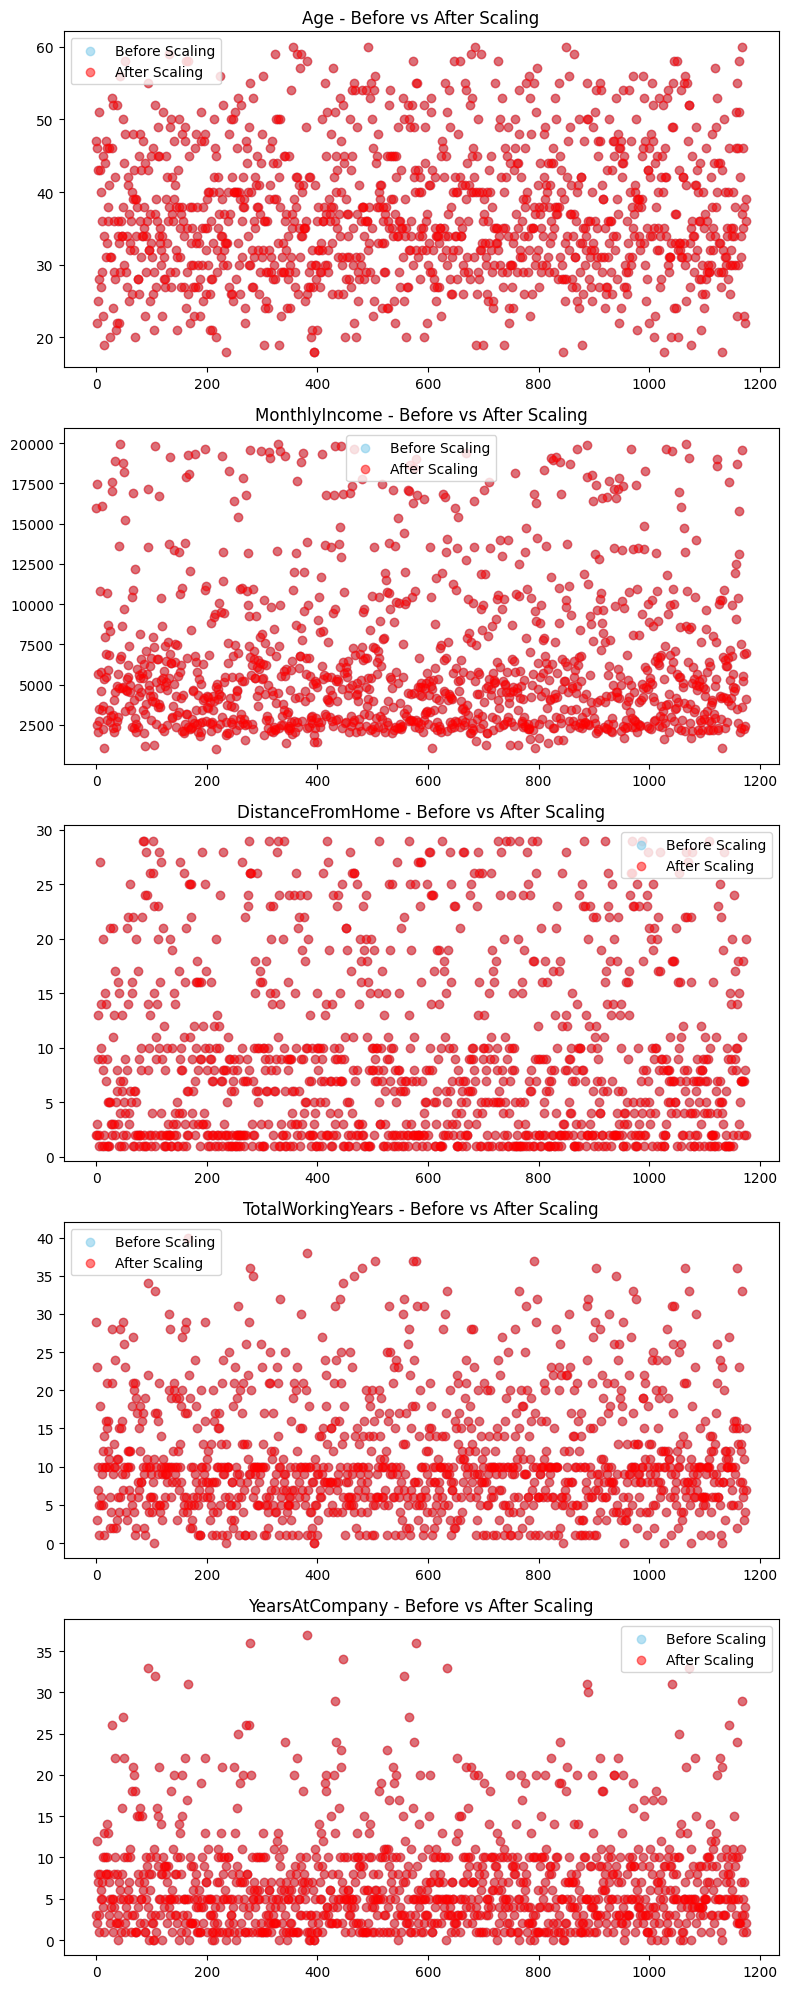

In [119]:
import matplotlib.pyplot as plt

scaled_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany']

fig, axes = plt.subplots(nrows=len(scaled_cols), figsize=(8, 20))

for i, col in enumerate(scaled_cols):
    axes[i].scatter(range(len(X_train[col])), X_train[col], color='skyblue', alpha=0.6, label='Before Scaling')
    axes[i].scatter(range(len(X_train_scaled[col])), X_train[col], color='red', alpha=0.5, label='After Scaling')
    axes[i].set_title(f'{col} - Before vs After Scaling')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [120]:
import numpy as np

scaled_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany']
print("Mean after scaling:\n", np.round(X_train_scaled[scaled_cols].mean(), 2))
print("\nStandard Deviation after scaling:\n", np.round(X_train_scaled[scaled_cols].std(), 2))

Mean after scaling:
 Age                 -0.0
MonthlyIncome       -0.0
DistanceFromHome    -0.0
TotalWorkingYears   -0.0
YearsAtCompany      -0.0
dtype: float64

Standard Deviation after scaling:
 Age                  1.0
MonthlyIncome        1.0
DistanceFromHome     1.0
TotalWorkingYears    1.0
YearsAtCompany       1.0
dtype: float64


In [121]:
from scipy.stats import zscore
z_scores = np.abs(zscore(X_train_scaled[scaled_cols]))
outlier_counts = (z_scores > 3).sum(axis=0)
print("Outliers after scaling:\n", outlier_counts)

Outliers after scaling:
 [ 0  0  0 14 21]


In [122]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Step 4: Train Logistic Regression with class weight balanced
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 5: Predictions and evaluation
y_pred = log_reg.predict(X_test)

# Step 6: Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

C:\Users\Himanshu Jangir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7551020408163265

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       247
           1       0.36      0.68      0.47        47

    accuracy                           0.76       294
   macro avg       0.64      0.73      0.66       294
weighted avg       0.84      0.76      0.78       294


Confusion Matrix:
 [[190  57]
 [ 15  32]]


In [123]:

# Initialize the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.8367346938775511

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.44      0.09      0.14        47

    accuracy                           0.84       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.78      0.84      0.79       294


Confusion Matrix:
 [[242   5]
 [ 43   4]]


In [124]:

# Step 1: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Train Random Forest on resampled data
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 3: Predict on test data
y_pred_rf_smote = rf_model.predict(X_test)

# Step 4: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smote))

Accuracy: 0.826530612244898

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       247
           1       0.42      0.23      0.30        47

    accuracy                           0.83       294
   macro avg       0.64      0.59      0.60       294
weighted avg       0.79      0.83      0.81       294


Confusion Matrix:
 [[232  15]
 [ 36  11]]


In [125]:
# Step 1: Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 2: Train Logistic Regression with scaled data
logreg_smote = LogisticRegression(random_state=42)
logreg_smote.fit(X_train_smote, y_train_smote)

# Step 3: Predict on original test set
y_pred_smote = logreg_smote.predict(X_test)

# Step 4: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))

Accuracy: 0.7040816326530612

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       247
           1       0.25      0.43      0.31        47

    accuracy                           0.70       294
   macro avg       0.56      0.59      0.56       294
weighted avg       0.77      0.70      0.73       294


Confusion Matrix:
 [[187  60]
 [ 27  20]]


C:\Users\Himanshu Jangir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [126]:

# Split your data again if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

# Train XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_sm, y_sm)

# Predictions
y_pred = xgb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

C:\Users\Himanshu Jangir\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:00:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8401360544217688

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.50      0.34      0.41        47

    accuracy                           0.84       294
   macro avg       0.69      0.64      0.66       294
weighted avg       0.82      0.84      0.83       294


Confusion Matrix:
 [[231  16]
 [ 31  16]]


In [128]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'scale_pos_weight': [3, 5, 10],  # Penalize "No" more
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

model = XGBClassifier()
grid = GridSearchCV(model, param_grid, scoring='f1', cv=5)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'scale_pos_weight': 3, 'subsample': 1.0}


In [1]:
for i in range(5):
    print(i)

0
1
2
3
4


In [2]:
c = 0
while c>5:
    print(c)
    c+=1